<a href="https://colab.research.google.com/github/sarahloree/Project-3--Credit-Card-User-Churn-Prediction/blob/main/AML_Project_3_LearnerNotebook_LASATER_SARAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
churn = pd.read_csv("/content/drive/MyDrive/MODULE 3- Advanced Machine Learning/PROJECT 3/BankChurners.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
churn.shape ##  Complete the code to view dimensions of the train data

(10127, 21)

OBSERVATION: There are 10,127 rows and 21 columns of data in the dataset.

---



In [ ]:
# let's create a copy of the data
data = churn.copy()

### Displaying the first few rows of the dataset

In [ ]:
# let's view the first 5 rows of the data
data.head(5) ##  Complete the code to view top 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
# let's view the last 5 rows of the data
data.tail(5) ##  Complete the code to view last 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

OBSERVATION: There are 8,606 out of 10,127 non-null values in Education_Level category and 9,378 out of 10,127 non-null values in Marital_Status category.

### Checking for duplicate values

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

0

OBSERVATION: There are no duplicate values in the dataset.

### Checking for missing values

In [ ]:
# let's check for missing values in the data
data.isnull().sum() ##  Complete the code to check missing entries in the train data

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


OBSERVATION:  There are 1,519 missing values in Education_Level category and 749 missing values in Marital_Status category.

### Statistical summary of the dataset

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T ##  Complete the code to print the statitical summary of the train data

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


OBSERVATION:

*   Customer Age: Avg 46.3 years, min 26, max 73
*   Dependent Count: Avg 2.3, min 0, max 5
*   Months On Book: Avg 35.9, min 13, max 56
*   Total Relationship Count: Avg 3.8, min 1, max 6
*   Months Inactive out of last 12 months: Avg 2.3, min 0, max 6
*   Contacts Count out of the last 12 months: Avg 2.45, min 0, max 6
*   Credit Limit: Avg 8,631.9, min 1,438.3, max 34,516  
*   Total Revolving Balance for last 12 months: Avg 1,162.8, min 0, max 2,517
*   Average Open to Buy Amount over last 12 months: 7,469.1, min 3, max 34,516
*   Total Transaction Amount Change from Q4 to Q1: Avg .76, min 0, max 3.39
*   Total Transaction Amount over last 12 months: Avg 4,404, min 510, max 18,484
*   Total Transaction Count over last 12 months: Avg 64.8, min 10, max 139
*   Total Transaction Count Change from Q4 to Q1: Avg .71, min 0, max 3.71
*   Average Credit Card Utilization Ratio over last 12 months: Avg .275, min 0, max .99


In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

OBSERVATIONS:


*   There are 1,627 attrited customers out of 10,127 total customers in dataset
*   There are more female than male customers in dataset
*   The most common education level in the dataset is Graduate level. The least common level is Doctorate.
*   The most common Marital Status classification of customers is Married and the least common classification is divorced.






In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

`Customer_Age`

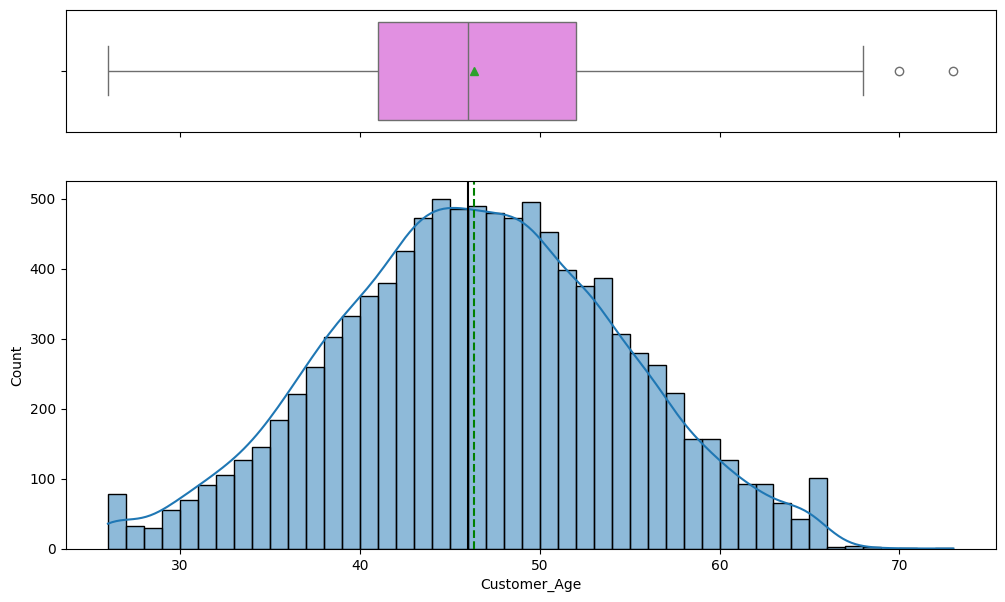

In [ ]:
histogram_boxplot(data, "Customer_Age", kde=True)

`Months_on_book`

OBSERVATION: Average and median customer age is 46 years old. 50% between 41 to 52 years. Minimum of 26 years, Q1 26-41, Q4 52-67 with few outliers at 70+ years.

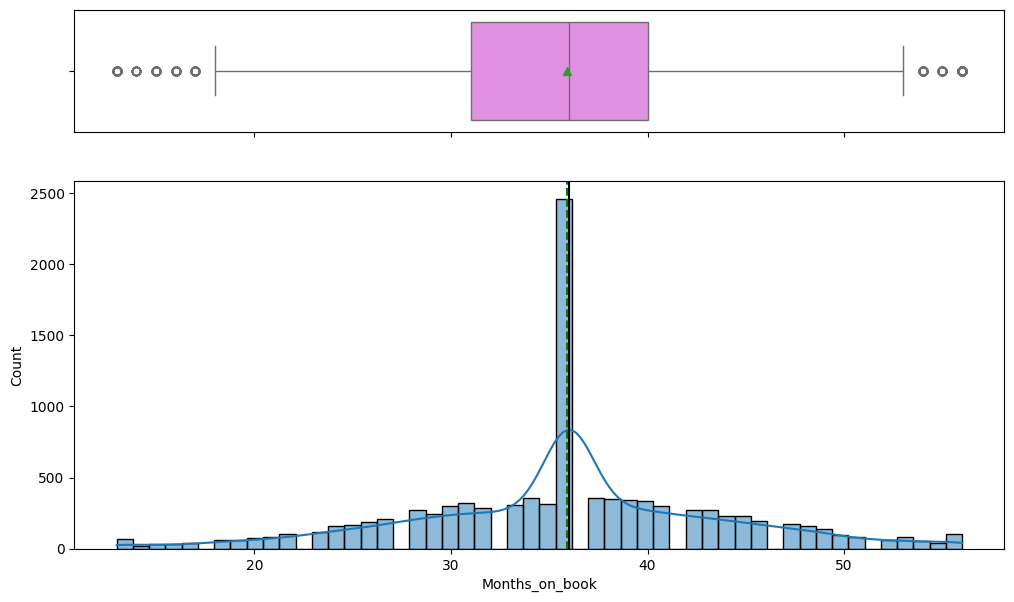

In [ ]:
histogram_boxplot(data, "Months_on_book", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

OBSERVATION: Average and median age of account at 36 months on book. 50% 31-40 months on book. Q1 13-31 months, Q4 40-53 months with few outliers above 53 months.

`Credit_Limit`

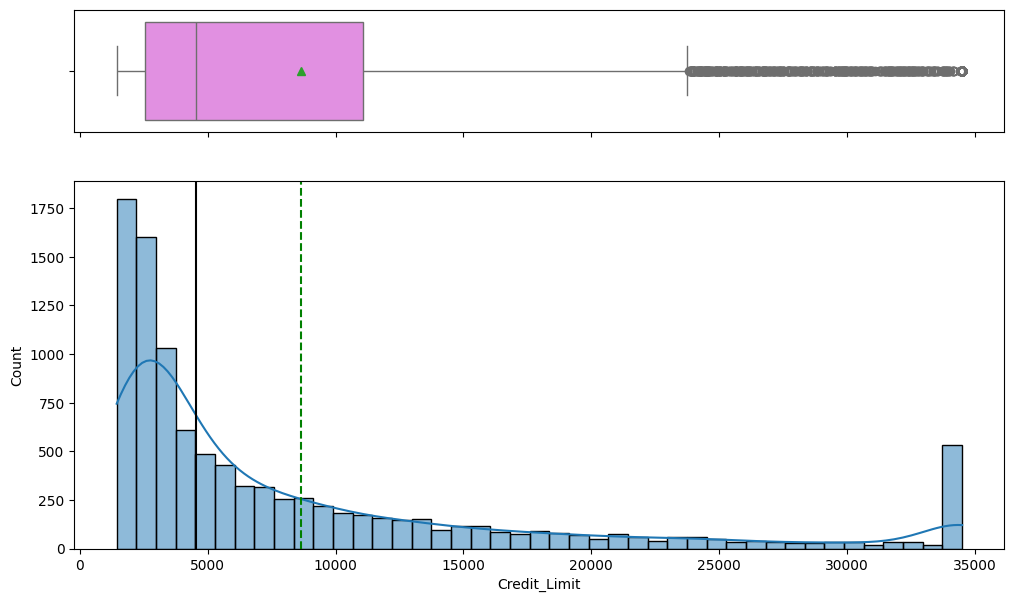

In [ ]:
histogram_boxplot(data, "Credit_Limit", kde=True) ## Complete the code to create histogram_boxplot for 'New_Price'

OBSERVATION: Credit limit charts are highly right-skewed; Average 8632, median 4550, 50% between 2555 to 11060. Q1 1440-2555, Q4 11065-23000 with many outliers at 23000+. 4th or 5th highest group in credit limit at around 33500 level.

`Total_Revolving_Bal`

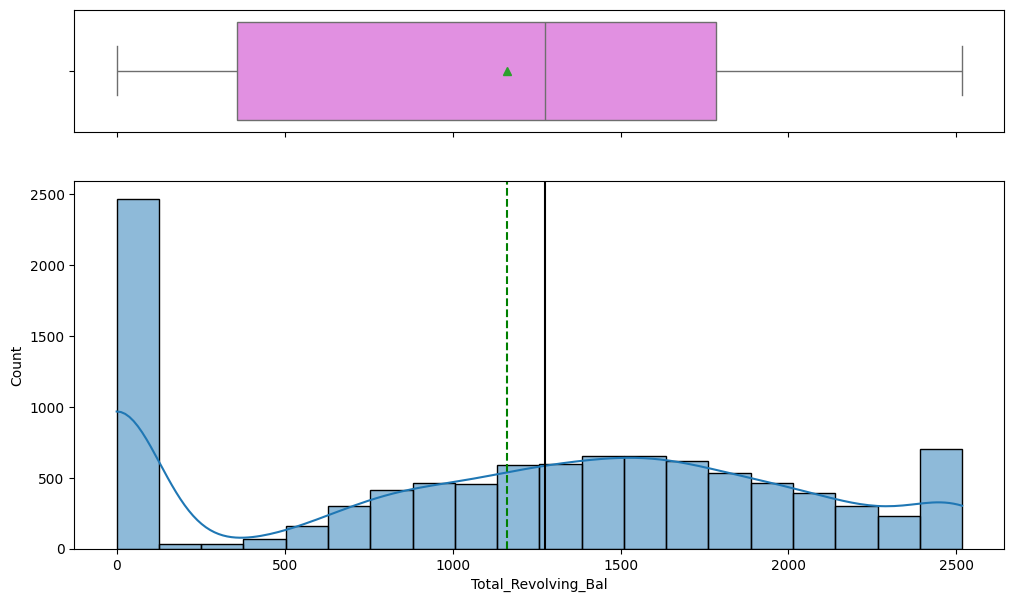

In [ ]:
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

OBSERVATION: Total revolving balance balance has an average of 1163 and median of 1276. 50% between 359 and 1276. Q1 0-359, Q4 1784 to max of 2517.

`Avg_Open_To_Buy`

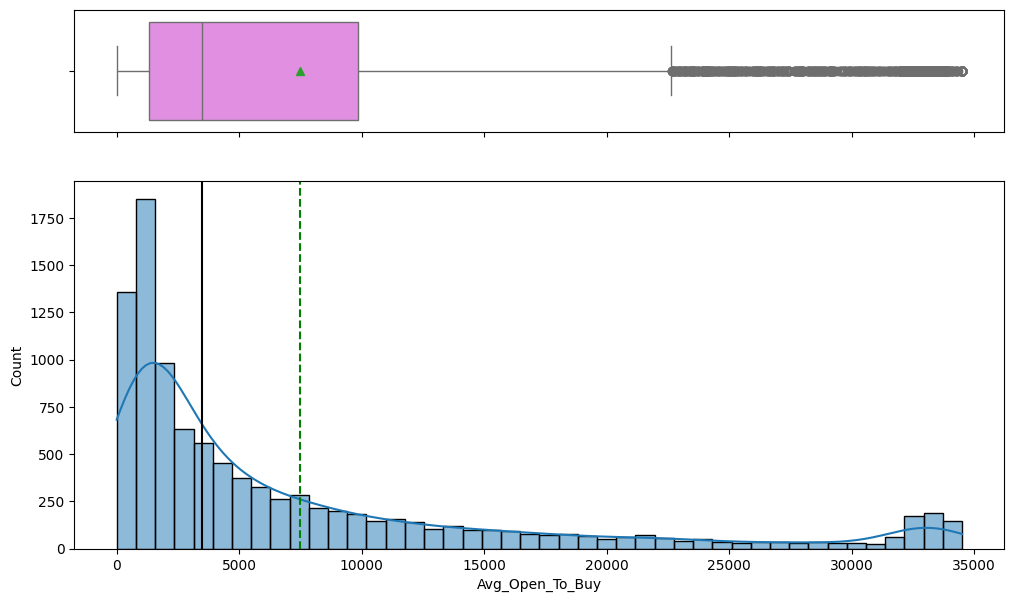

In [ ]:
histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

OBSERVATION: Average Open to Buy graph and chart are right-skewed. Average around 7,500 and median at around 3000. 50% between around 2,000-10,000. Q1 0-2,000, Q3 at 10,000-22,500 with many outliers between 25,000 35,000.

`Total_Trans_Ct`

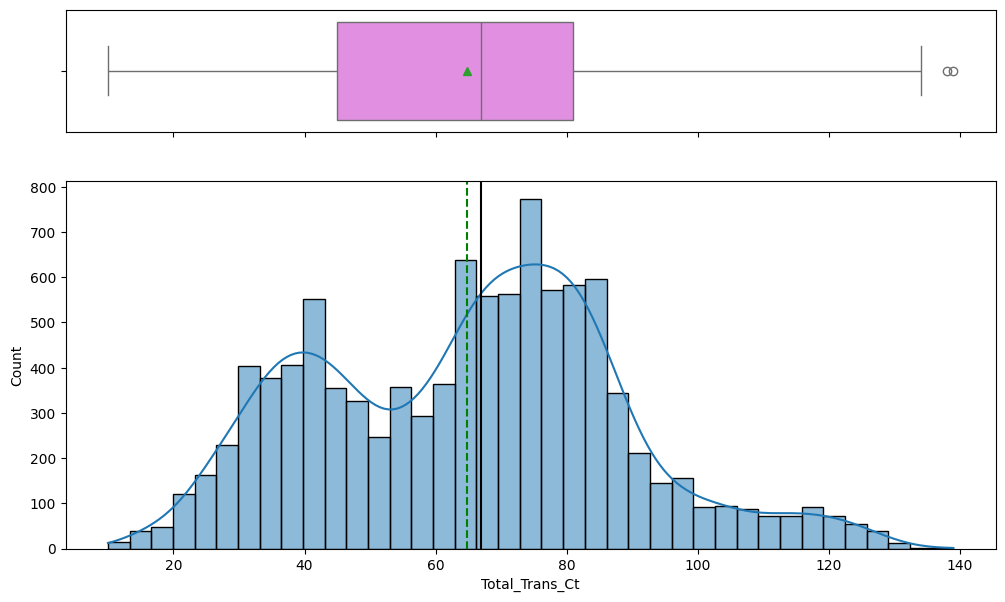

In [ ]:
histogram_boxplot(data, "Total_Trans_Ct", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

OBSERVATION: Total Transaction Count has an average of around 62 and median of around 68. 50% between 44-81. Q1 9-44, Q3 81-137 with few outliers to 140.

`Total_Amt_Chng_Q4_Q1`

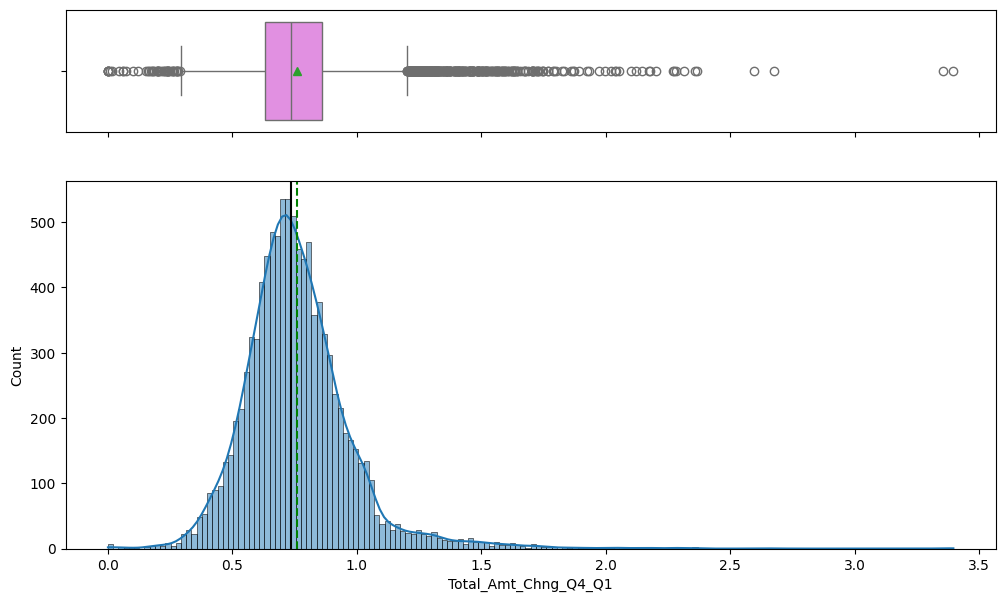

In [ ]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

OBSERVATION: Total Amount Change average at around .80, median at around .75. Q1 between .60-.80, Q4 between around .80-1.2 with many outliers beyond Q4 to max 3.3.

**Let's see total transaction amount distributed**

`Total_Trans_Amt`

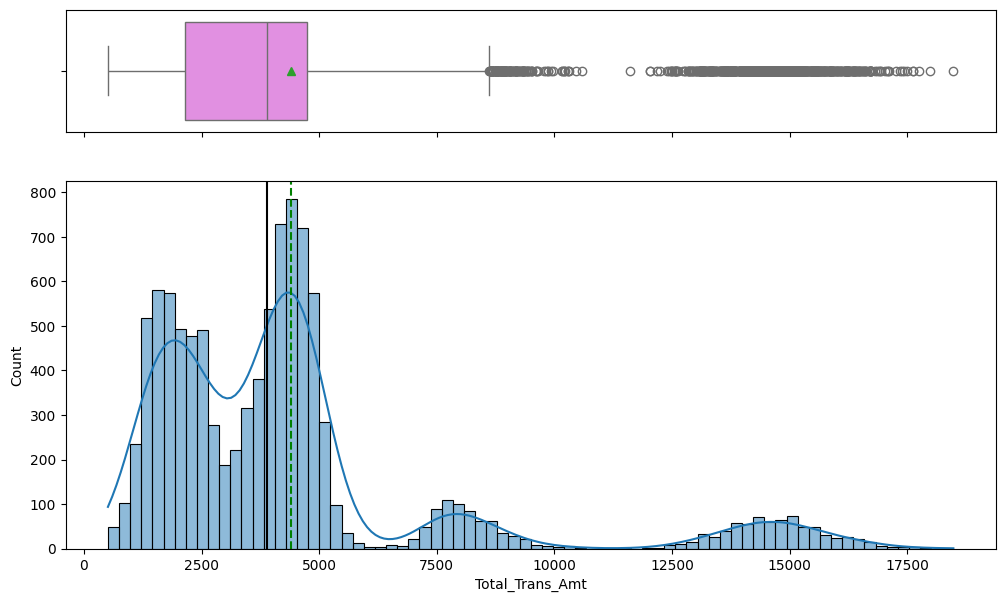

In [ ]:
histogram_boxplot(data, "Total_Trans_Amt", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

OBSERVATION: Total Transaction Amount average at around 4200, median at 3700. 50% between around 2250-4700. Q1 750-2250, Q4 4700-8700 with many outliers beyond to max 19,000.  

`Total_Ct_Chng_Q4_Q1`

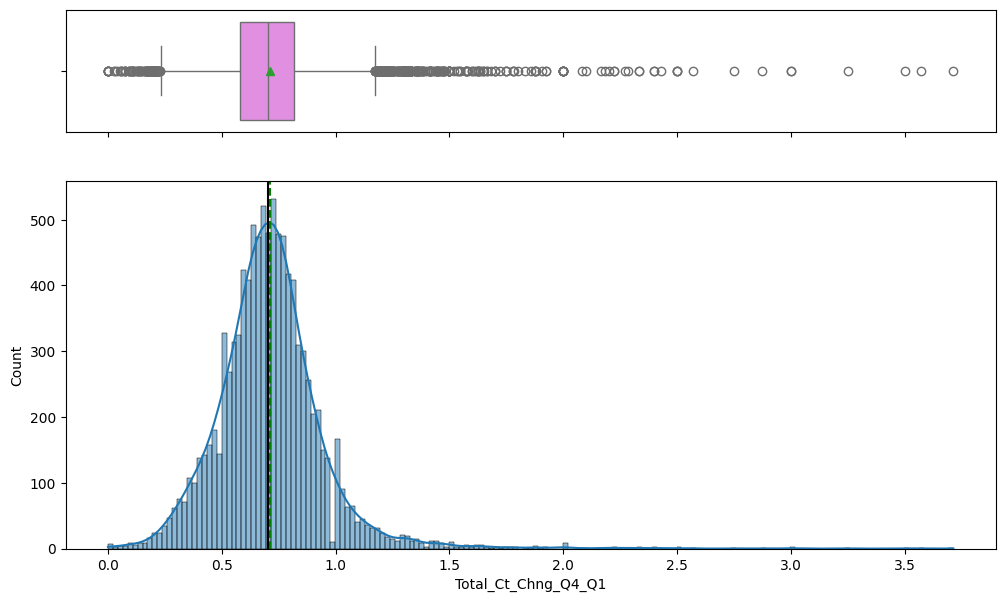

In [ ]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

OBSERVATION: Total Count Change from Q4 to Q1 average .75, median of .70. 50% between .60-.80. Q1 around .25-.60, Q4 around .85-1.75.

`Avg_Utilization_Ratio`

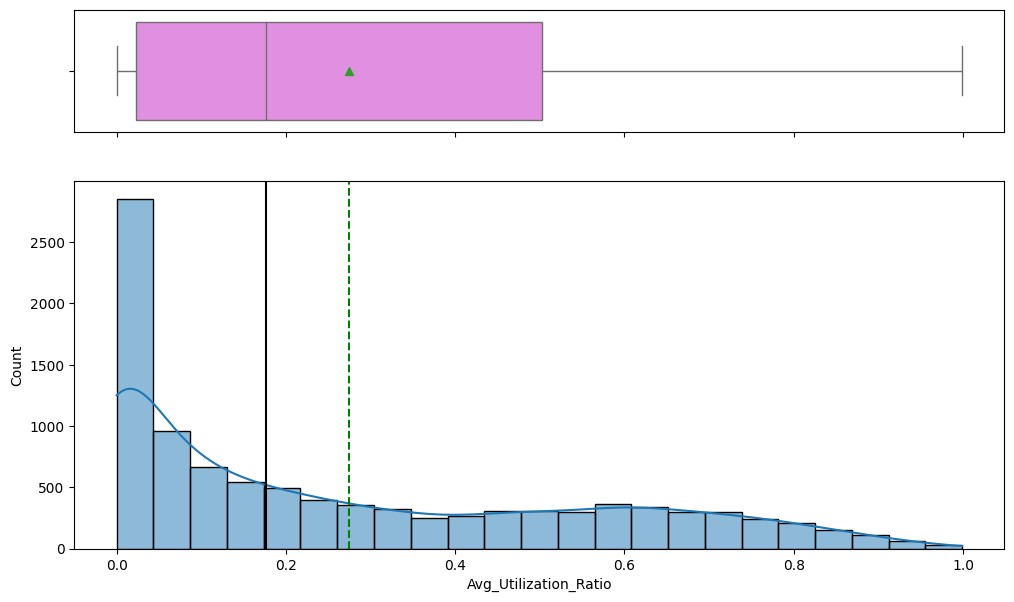

In [ ]:
histogram_boxplot(data, "Avg_Utilization_Ratio", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

OBSERVATION: Average Utilization Ratio average of 0.275, median of 0.19. 50% between 0.025-0.5. Q1 0.0-0.025, Q4 0.5 -1.0.  

`Dependent_count`

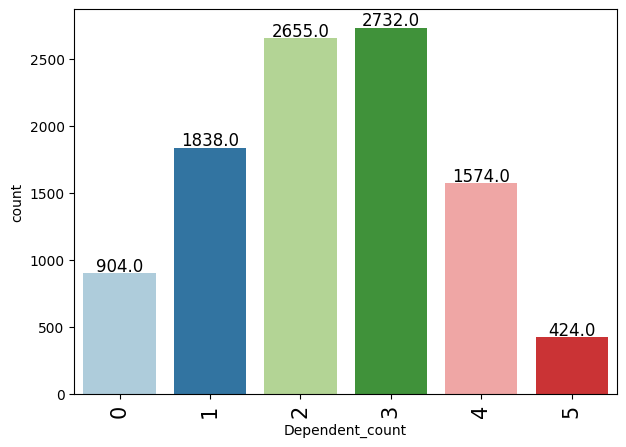

In [ ]:
labeled_barplot(data, "Dependent_count")

OBSERVATION:

1.   Dependent count of 3: 2,732
2.   Dependent count of 2: 2,655
3. Dependent count of 1: 1,838
4. Dependent count of 4: 1,574
5. Dependent count of 0: 904
6. Dependent count of 5: 424



`Total_Relationship_Count`

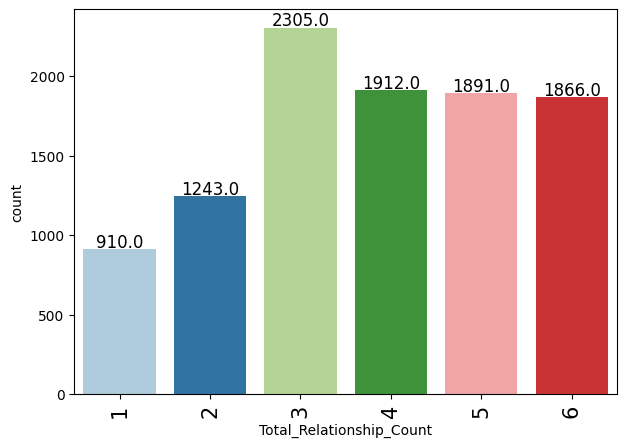

In [ ]:
labeled_barplot(data, "Total_Relationship_Count") ## Complete the code to create labeled_barplot for 'Total_Relationship_Count'

OBSERVATION:

Total Relationship Count:
1.   3: 2,305
2.   4: 1,912
3. 5: 1,891
4. 6: 1,866
5. 2: 1,243
6. 1: 910



`Months_Inactive_12_mon`

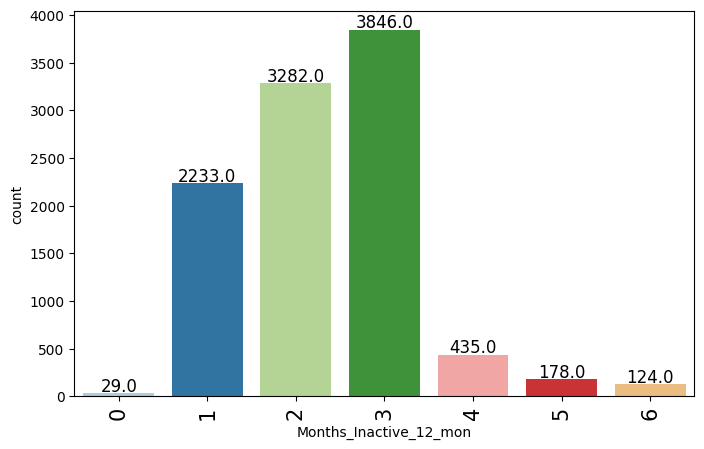

In [ ]:
labeled_barplot(data, "Months_Inactive_12_mon") ## Complete the code to create labeled_barplot for 'Months_Inactive_12_mon'

OBSERVATION:
Months inactive in last 12 months


1.   3: 3,846
2.   2: 3,282
3. 1: 2,233
4. 4: 435
5. 5: 178
6. 6:124
7. 0: 29



`Contacts_Count_12_mon`

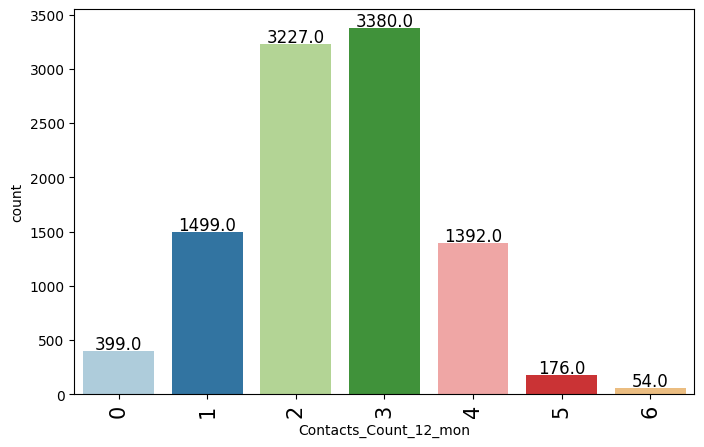

In [ ]:
labeled_barplot(data, "Contacts_Count_12_mon") ## Complete the code to create labeled_barplot for 'Contacts_Count_12_mon'

OBSERVATION:

Contacts count in last 12 months


1.   3: 3,380
2.   2: 3,227
3. 1: 1,499
4. 4: 1,392
5. 0: 399
6. 5: 176
7. 6: 54



`Gender`

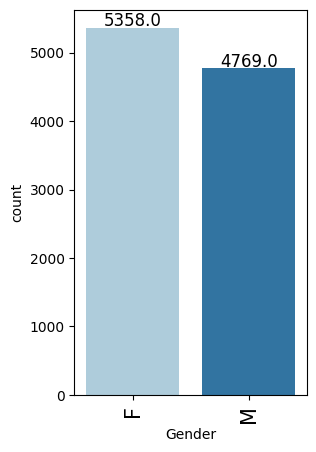

In [ ]:
labeled_barplot(data, "Gender") ## Complete the code to create labeled_barplot for 'Gender'

OBSERVATION: Total: 10,127 customers

Males: 5,358
Females: 4,769

**Let's see the distribution of the level of education of customers**

`Education_Level`

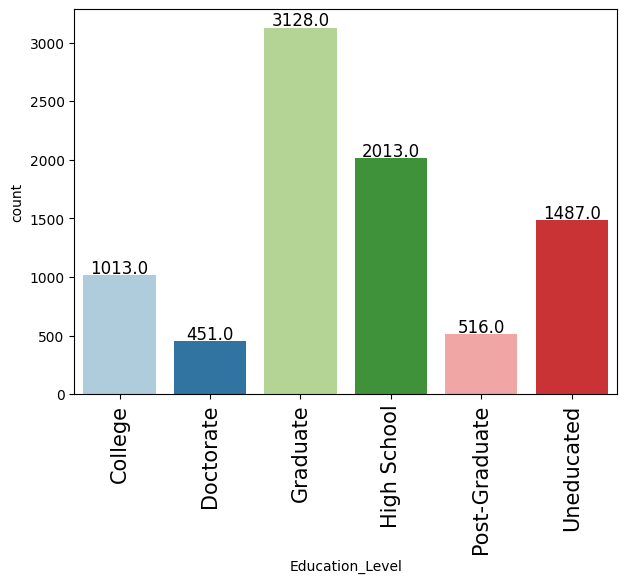

In [ ]:
labeled_barplot(data, "Education_Level") ## Complete the code to create labeled_barplot for 'Education_Level'

OBSERVATION:
Education Level


1.   Graduate: 3,128
2.   High School: 2,013
3. Uneducated 1,487
4. College: 1,013
5. Post-Graduate: 516
6. Doctorate: 451



`Marital_Status`

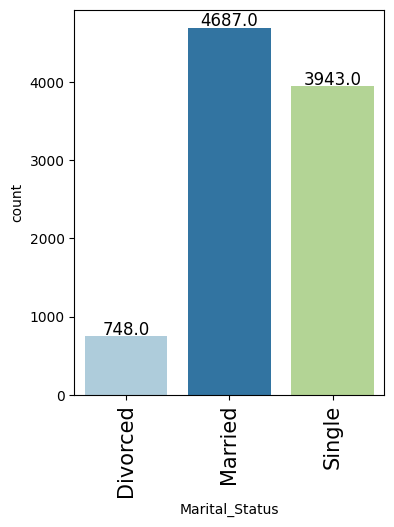

In [ ]:
labeled_barplot(data, "Marital_Status") ## Complete the code to create labeled_barplot for 'Marital_Status'

OBSERVATION:
Marital Status


1.   Married: 4,687
2.   Single: 3,943
3. Divorced: 748



**Let's see the distribution of the level of income of customers**

`Income_Category`

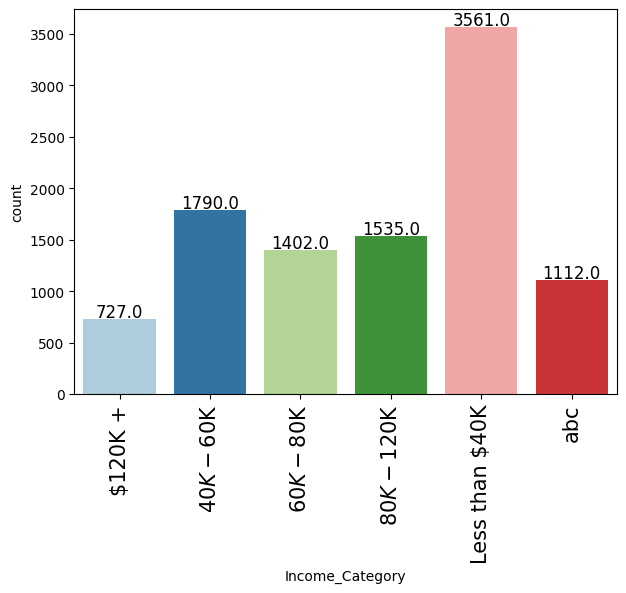

In [ ]:
labeled_barplot(data, "Income_Category") ## Complete the code to create labeled_barplot for 'Income_Category'

OBSERVATION:
Income Category


1.   Less than 40K: 3,561
2.   40-60K: 1,790
3. 80-120K: 1,535
4. 60-80K: 1,402
5. ABC: 1,112
6. 120K+: 727

There are nearly 2X the amount of customers making less than 40K than the second highest number of customers making 40-60K.



`Card_Category`

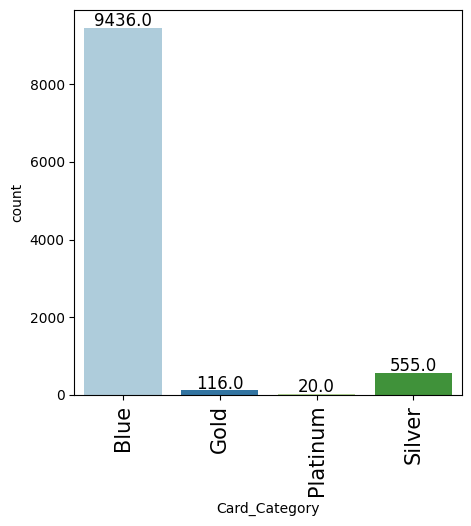

In [ ]:
labeled_barplot(data, "Card_Category") ## Complete the code to create labeled_barplot for 'Card_Category'

OBSERVATION:
Card Category


1.   Blue: 9,436
2.   Silver: 555
3. Gold: 116
4. Platinum: 20

There are vastly more holders of the Blue-level card, nearly 9X more than the next highest level Silver card. Platinum, the lowest number of holders, may have high annual fees or other reasons keeping more people from holding this card. Fees on all cards other than blue may be higher than customers would like or be able to to pay.



`Attrition_Flag`

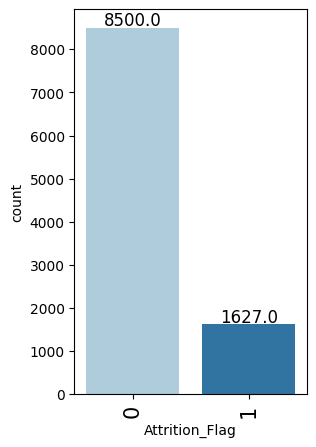

In [ ]:
labeled_barplot(data, "Attrition_Flag") ## Complete the code to create labeled_barplot for 'Attrition_Flag'

OBSERVATION:

Customer Attrition

1.   No: 8,500
2.   Yes: 1,627



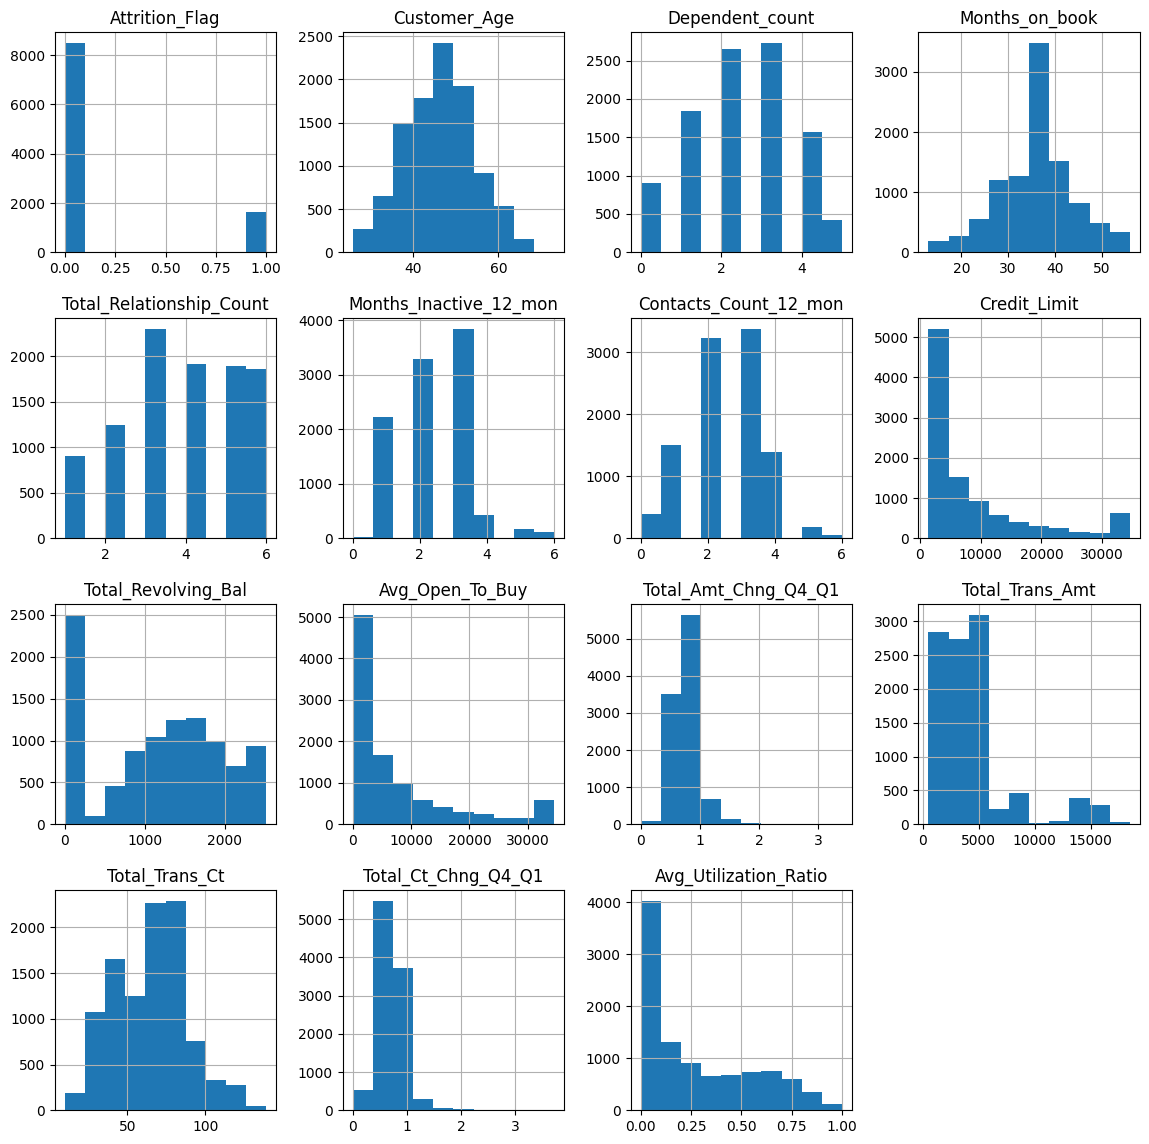

In [ ]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

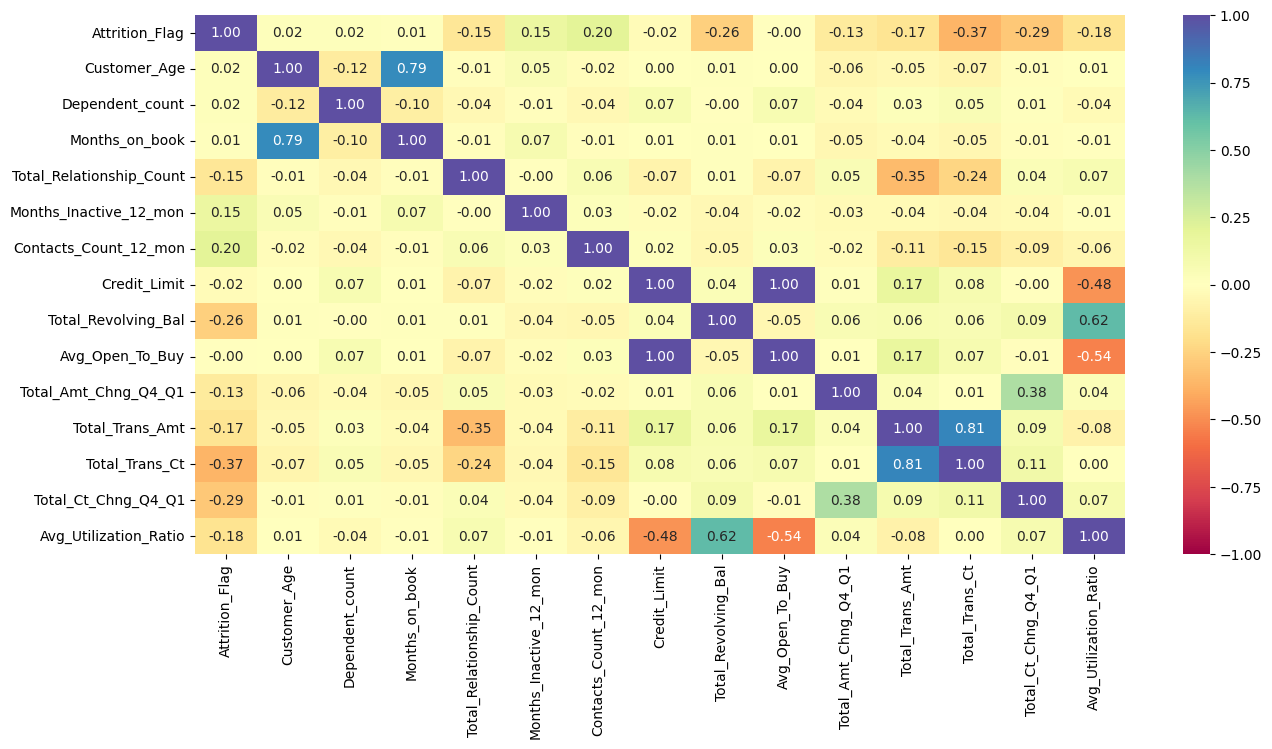

In [ ]:
data_numeric = data.select_dtypes(include=['number'])
plt.figure(figsize=(15, 7))
sns.heatmap(data_numeric.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

OBSERVATION:

Correlations between customer features:



1.   Total Transaction Count & Total Transaction Amount highly positively correlated at 0.81.
2.   Months on Book & Customer Age highly positively correlated at 0.79.
3. Total Revolving Balance & Average Utilization Ratio positively correlated at 0.62.
4. Average Open to Buy & Average Utilization Ratio moderately negatively correlated at -0.54.
5. Credit Limit and Average Utilization Ratio moderately negatively correlated at -0.48.



`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


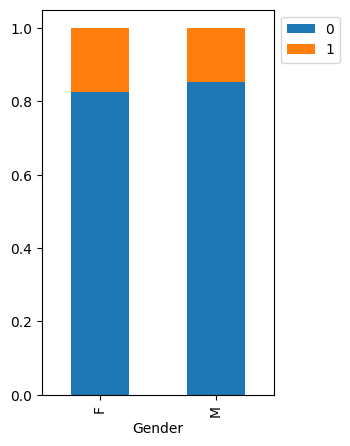

In [ ]:
stacked_barplot(data, "Gender", "Attrition_Flag")

OBSERVATION:

Attrition status by sex:

Not attrited
1.   Male: 4,072
2.   Female: 4,428

TOTAL: 8,500


Attrited
1.   Male: 697 attrited
2.   Female: 930 attrited

TOTAL: 1,627

There are more female customers overall, more current, and more attrited.



`Attrition_Flag vs Marital_Status`

Marital_Status  Divorced  Married  Single   All
Attrition_Flag                                 
All                  748     4687    3943  9378
0                    627     3978    3275  7880
1                    121      709     668  1498
------------------------------------------------------------------------------------------------------------------------


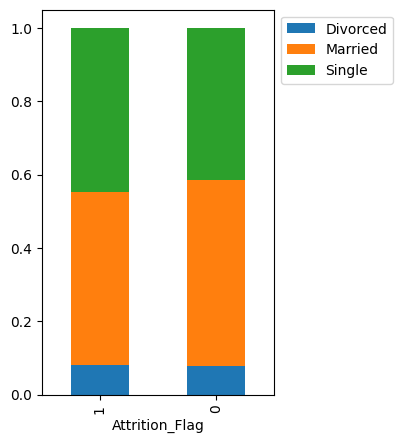

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Marital_Status") ## Complete the code to create distribution_plot for Attrition_Flag vs Marital_Status

OBSERVATION:

Attrition Status by Marital Status

Not attrited
1.   Married: 3,978
2.   Divorced:627
3. Single: 3,275

TOTAL: 7,880

Attrited
1.   Married: 709
2.   Divorced: 121
3. Single: 668

TOTAL: 1,498






`Attrition_Flag vs Education_Level`

Education_Level  College  Doctorate  Graduate  High School  Post-Graduate  \
Attrition_Flag                                                              
All                 1013        451      3128         2013            516   
0                    859        356      2641         1707            424   
1                    154         95       487          306             92   

Education_Level  Uneducated   All  
Attrition_Flag                     
All                    1487  8608  
0                      1250  7237  
1                       237  1371  
------------------------------------------------------------------------------------------------------------------------


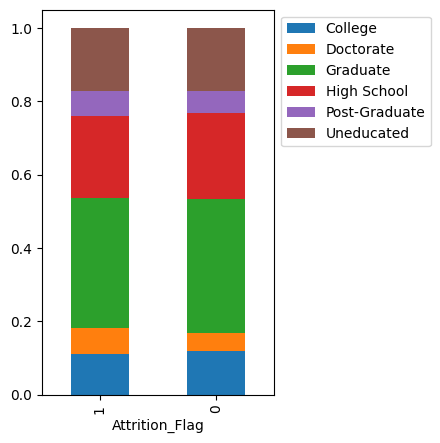

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Education_Level") ## Complete the code to create distribution_plot for Attrition_Flag vs Education_Level

OBSERVATION:

Attrition status by Education Level

Not attrited


1.   College: 859
2.   Doctorate: 356
3. Graduate: 2,641
4. High School: 1,707
5. Post-Graduate: 424
6. Uneducated: 1,250

TOTAL: 7,237

Attrited


1.   College: 154
2.   Doctorate: 95
3. Graduate: 487
4. High School: 306
5. Post-Graduate: 92
6. Uneducated: 237

TOTAL: 1,371




`Attrition_Flag vs Income_Category`

Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Attrition_Flag                                                     
All                  727         1790         1402          1535   
0                    601         1519         1213          1293   
1                    126          271          189           242   

Income_Category  Less than $40K   abc    All  
Attrition_Flag                                
All                        3561  1112  10127  
0                          2949   925   8500  
1                           612   187   1627  
------------------------------------------------------------------------------------------------------------------------


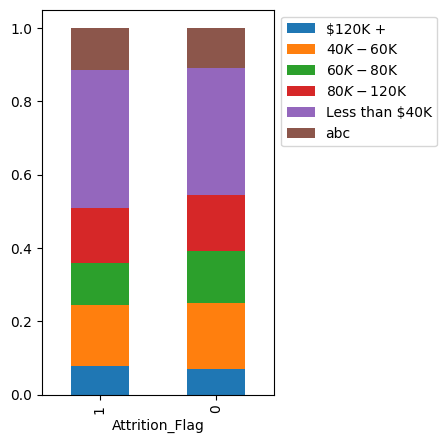

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Income_Category") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

OBSERVATION:

Attrition status by Income Category

Not attrited


1.   120K+: 601
2.   40-60K: 1,519
3. 60-80K: 1,213
4. 80-120K: 1,293
5. Less than 40K: 2,949
6. ABC:  925

TOTAL: 8,500

Attrited


1.   120K+: 126
2.   40-60K: 271
3. 60-80K: 189
4. 80-120K: 242
5. Less than 40K: 612
6. ABC:  187

TOTAL: 1,627

`Attrition_Flag vs Contacts_Count_12_mon`

Contacts_Count_12_mon    0     1     2     3     4    5   6    All
Attrition_Flag                                                    
1                        7   108   403   681   315   59  54   1627
All                    399  1499  3227  3380  1392  176  54  10127
0                      392  1391  2824  2699  1077  117   0   8500
------------------------------------------------------------------------------------------------------------------------


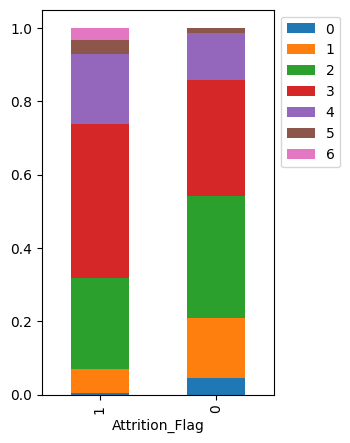

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Contacts_Count_12_mon") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

OBSERVATION:

Attrition status by Contacts Count in last 12 months

Not attrited


1.   0: 392
2.   1: 1,391
3. 2: 2,824
4. 3: 2,699
5. 4: 1,077
6. 5:  117
7. 6: 0

TOTAL: 8,500

Attrited


1.   0: 7
2.   1: 108
3. 2: 403
4. 3: 681
5. 4: 315
6. 5:  59
7. 6: 54

TOTAL: 1,627

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

Months_Inactive_12_mon   0     1     2     3    4    5    6    All
Attrition_Flag                                                    
All                     29  2233  3282  3846  435  178  124  10127
1                       15   100   505   826  130   32   19   1627
0                       14  2133  2777  3020  305  146  105   8500
------------------------------------------------------------------------------------------------------------------------


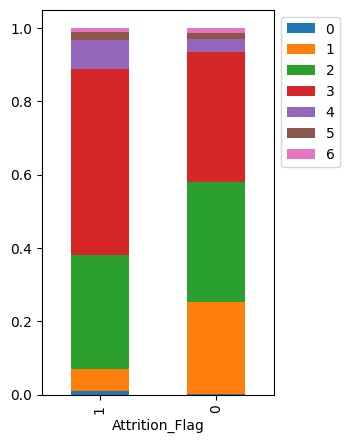

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Months_Inactive_12_mon") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_Inactive_12_mon

OBSERVATION:

Attrition status by Months Inactive in last 12 months

Not attrited


1.   0: 14
2.   1: 2,133
3. 2: 2,777
4. 3: 3,020
5. 4: 305
6. 5:  146
7. 6: 105

TOTAL: 8,500

Attrited


1.   0: 15
2.   1: 100
3. 2: 505
4. 3: 826
5. 4: 130
6. 5:  32
7. 6: 19

TOTAL: 1,627

`Attrition_Flag vs Total_Relationship_Count`

Total_Relationship_Count    1     2     3     4     5     6    All
Attrition_Flag                                                    
All                       910  1243  2305  1912  1891  1866  10127
0                         677   897  1905  1687  1664  1670   8500
1                         233   346   400   225   227   196   1627
------------------------------------------------------------------------------------------------------------------------


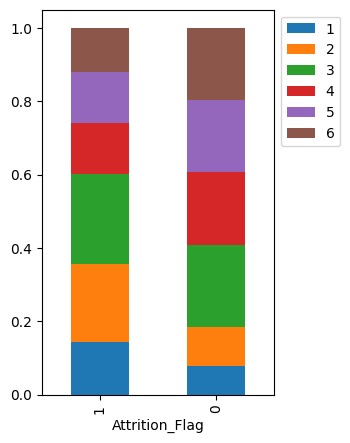

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Total_Relationship_Count") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Relationship_Count

OBSERVATION:

Attrition status by Total Relationship Count

Not attrited


1.   1: 677
2.   2: 897
3. 3: 1,905
4. 4: 1,687
5. 5: 1,664
6. 6:  1,670


TOTAL: 8,500

Attrited


1.   1: 233
2.   2: 346
3. 3: 400
4. 4: 225
5. 5: 227
6. 6:  196

TOTAL: 1,627

`Attrition_Flag vs Dependent_count`

Dependent_count    0     1     2     3     4    5    All
Attrition_Flag                                          
All              904  1838  2655  2732  1574  424  10127
0                769  1569  2238  2250  1314  360   8500
1                135   269   417   482   260   64   1627
------------------------------------------------------------------------------------------------------------------------


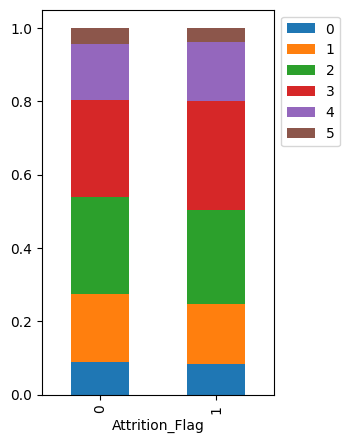

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Dependent_count") ## Complete the code to create distribution_plot for Attrition_Flag vs Dependent_count

OBSERVATION:

Attrition status by Total Dependent Count

Not attrited


1.   0: 769
2.   1: 1,569
3. 2: 2,238
4. 3: 2,250
5. 4: 1,314
6. 5:  360


TOTAL: 8,500

Attrited


1.   0: 135
2.   1: 269
3. 2: 417
4. 3: 482
5. 4: 260
6. 5:  64

TOTAL: 1,627

`Total_Revolving_Bal` vs `Attrition_Flag`

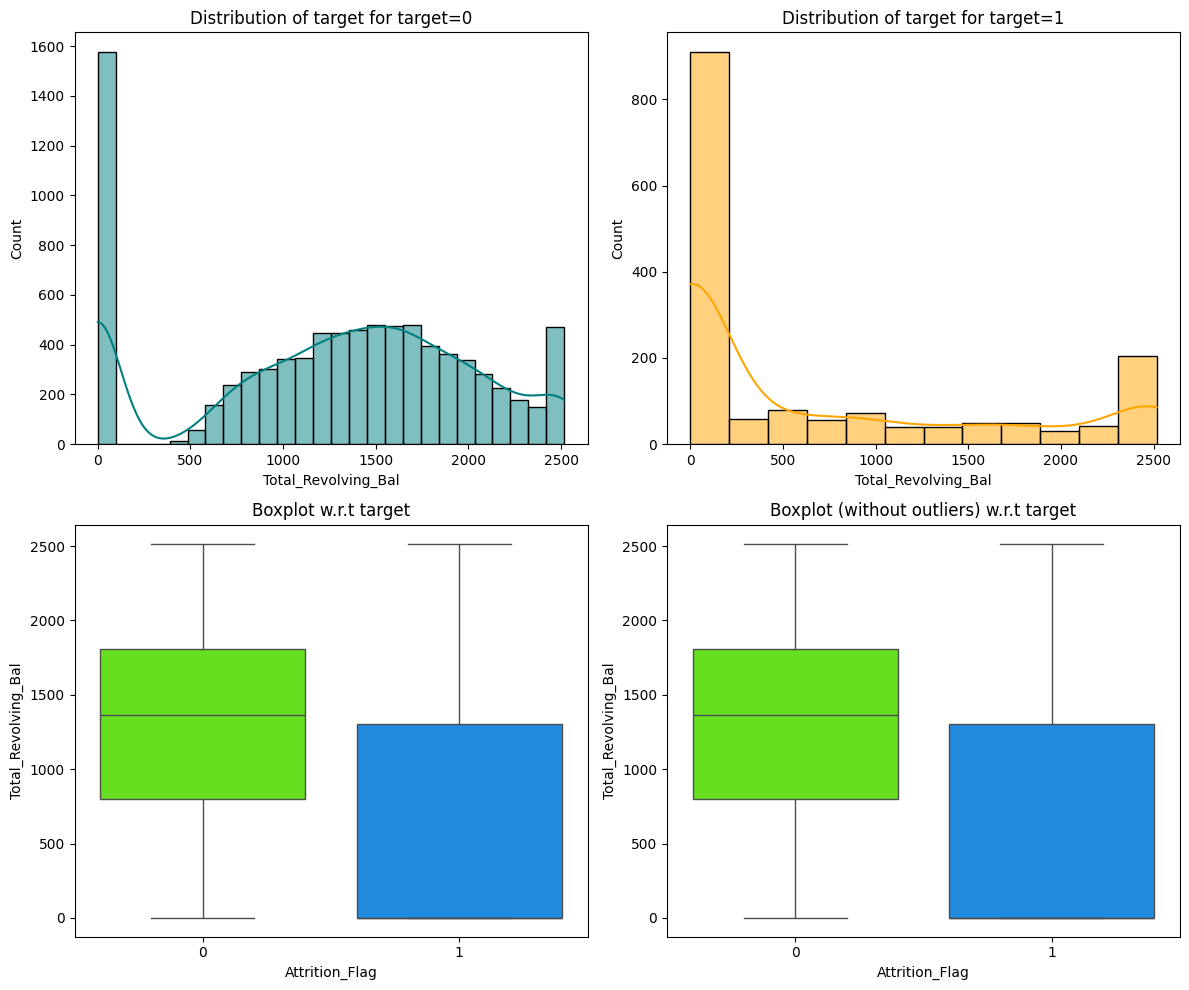

In [ ]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

OBSERVATION:

Attrition status by Total Revolving Balance

Not attrited

Highest balance is 0 at just under 1,600 customers. A balance of around 1,200 to 1,500 and balance of 2,500 have a similar distribution.

Attrited

Highest balance is 0 at around 900 individuals. A balance of 2,500 is next highest distribution around 200 individuals.

Boxplots with outliers-


1.   Not attrited: 50% around 800-1,800. Q1 0-800, Q4 1,800-2,500.
2.   Attrited: 50% 0-1,250. Q4 1,250-2,500.
NO OUTLIERS



Boxplots without outliers-


1.   Not attrited: 50% around 800-1,800. Q1 0-800, Q4 1,800-2,500.
2.   Attrited: 50% 0-1,250. Q4 1,250-2,500.


`Attrition_Flag vs Credit_Limit`

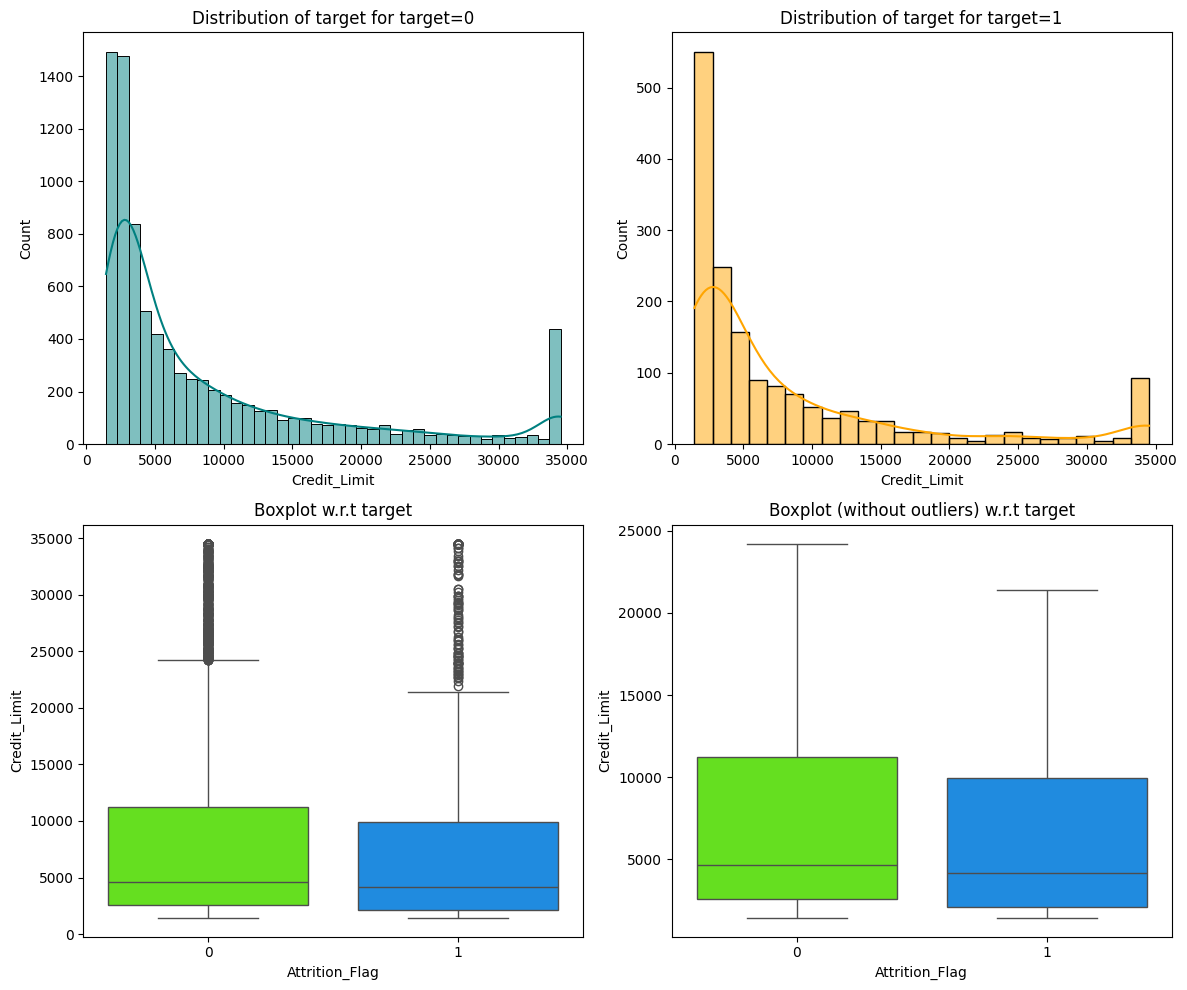

In [ ]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Credit_Limit

OBSERVATION:

Attrition status by Credit Limit

Not attrited

Mostly right-skewed distribution with exception of customers observed in highest possible credit limit category at 35,000. Most common credit limit is 2,000 with 1,500 customers. Next most common limit is around 2,500 at just under 1,500 customers. A credit limit of around 2,750 has third highest number of customers at around 850. About 475 customers have an uncharacteristically high credit limit of just below 35,000.

Attrited

Most common credit limit is around 2,000 with 500+ individuals. A credit limit of 2,500 is next highest distribution around 250 individuals. Third highest limit is 5,000 with around 160 individuals and the fourth highest limit is much higher around almost 35,000 with about 100 individuals.

Boxplots with outliers-


1.   Not attrited: 50% around 2,500-11,000. Q1 2,000-2,500, Q4 11,000-24,750.

MANY OUTLIERS BEYOND Q4
2.   Attrited: 50% 2,500-9,000. Q1, 2,000-2,500. Q4 9,000-22,500.

MANY OUTLIERS BEYOND Q4



Boxplots without outliers-


1.   Not attrited: 50% around 2,500-11,000. Q1 2,000-2,500, Q4 11,000-24,750.
2.   Attrited: 50% 2,500-9,000. Q1, 2,000-2,500. Q4 9,000-22,500.

`Attrition_Flag vs Customer_Age`

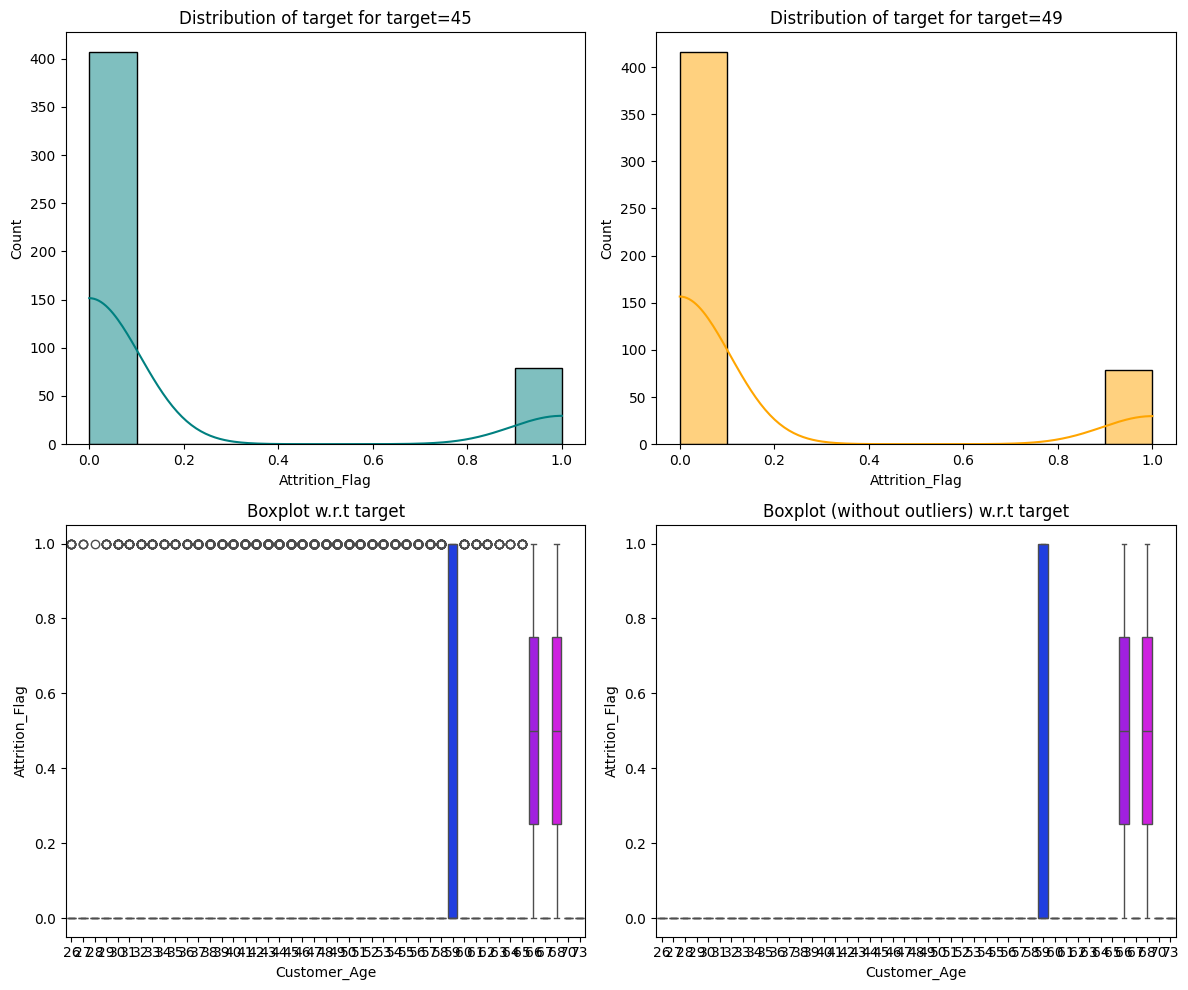

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Customer_Age") ## Complete the code to create distribution_plot for Attrition_Flag vs Customer_Age

OBSERVATION:

Attrition status by Customer Age


`Total_Trans_Ct` vs `Attrition_Flag`

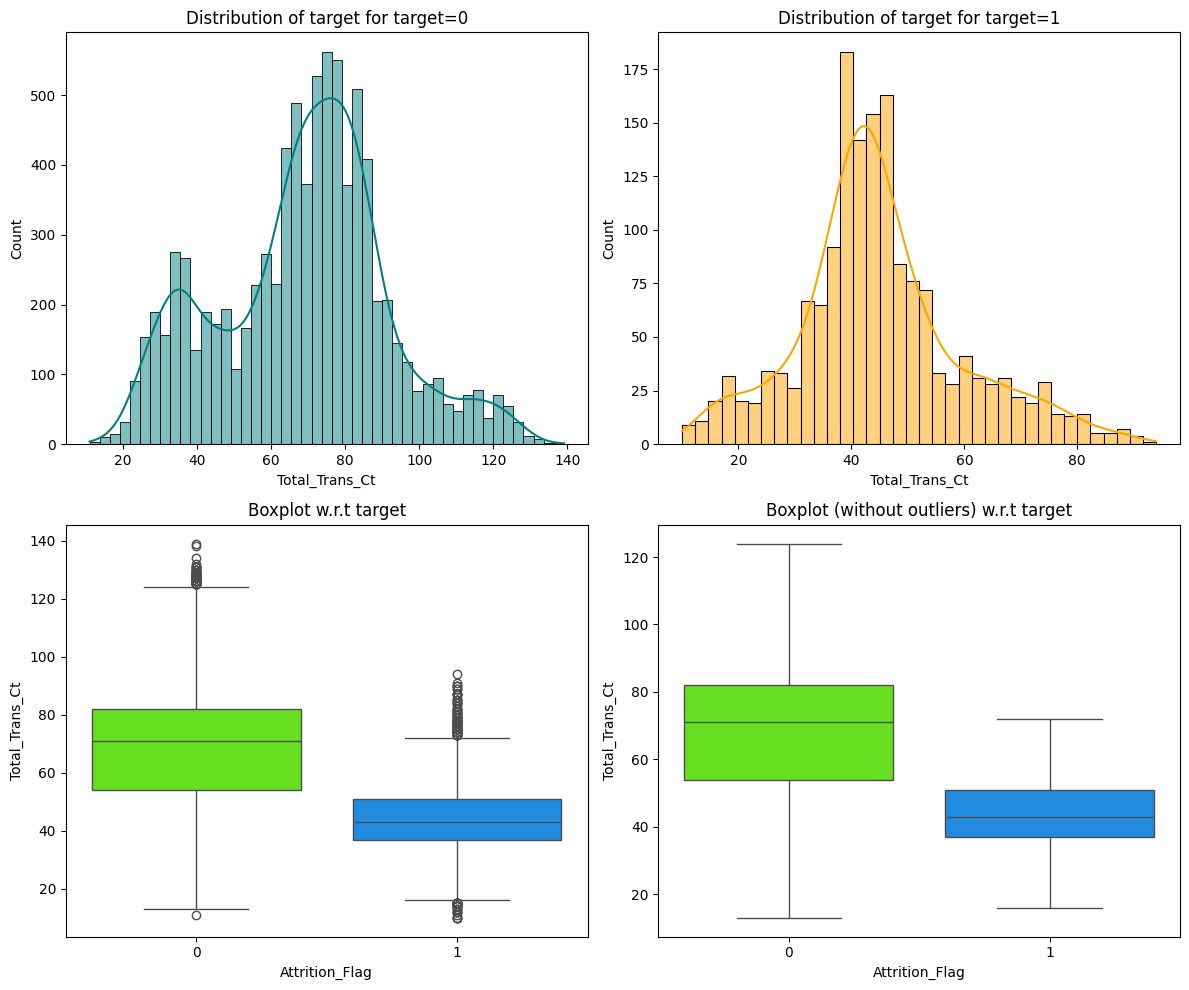

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Ct vs Attrition_Flag

OBSERVATION:

Attrition status by Total Transaction Count

Not attrited

Highest transaction count is right around 75 at over 500 customers, with transaction counts of 72 and 76 being also over 500 customers each.

Attrited

Highest transaction count is right around 39 at over 175 customers, with transaction counts of 44 and 42 being over 150 customers each.

Boxplots with outliers-


1.   Not attrited: 50% around 55-82. Q1 10-55, Q4 82-122.
MANY OUTLIERS BEYOND Q4
2.   Attrited: 50% 32-50. Q1 15-32, Q4 50-75.
MANY OUTLIERS BEYOND Q4




Boxplots without outliers-


1.   Not attrited: 50% around 55-82. Q1 10-55, Q4 82-122.
2.   Attrited: 50% 32-50. Q1 15-32, Q4 50-75.

`Total_Trans_Amt` vs `Attrition_Flag`

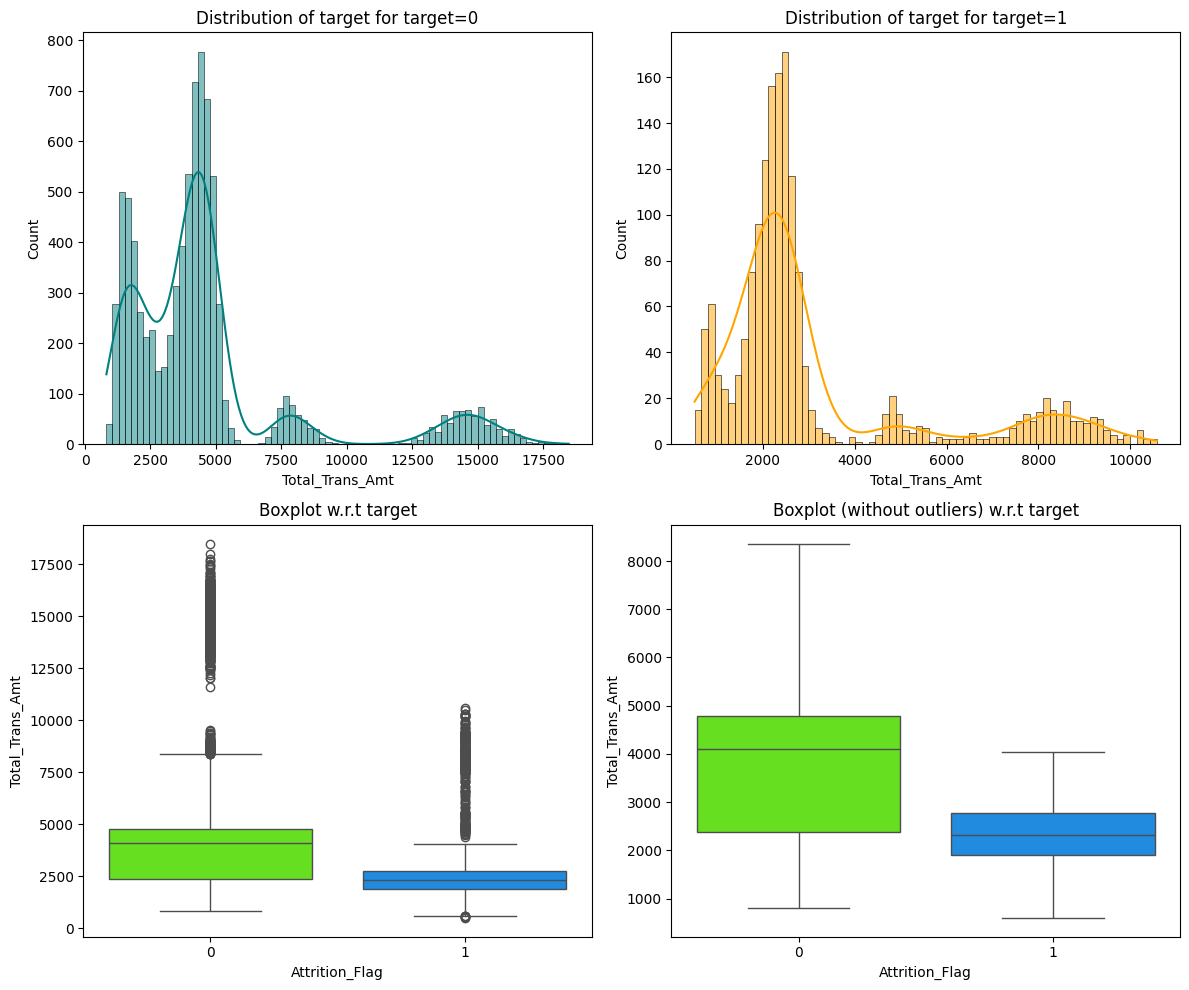

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Amt vs Attrition_Flag

OBSERVATION:

Attrition status by Total Transaction Amount

Not attrited

Highest transaction amount is right around 4,200 at around 780 customers, with transaction amounts of 4,000 and 4,500 being around 720 and 680 respectively.

Attrited

Highest transaction amount is right around 2,500 at 160+ individuals and 2,300 and 2,100 as next highest transaction amounts at around 160 and 155 indivuduals respectively.

Boxplots with outliers-


1.   Not attrited: 50% around 2,5000-5,000. Q1 1,000-2,500, Q4 5,000-8,500.
MANY OUTLIERS BEYOND Q4
2.   Attrited: 50% 2,300-2,600. Q1 900-2,300, Q4 2,600-4,000.
MANY OUTLIERS BEYOND Q4,FEW JUST BELOW Q1




Boxplots without outliers-


1.   Not attrited: 50% around 2,5000-5,000. Q1 1,000-2,500, Q4 5,000-8,500.
2.   Attrited: 50% 2,300-2,600. Q1 900-2,300, Q4 2,600-4,000.

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

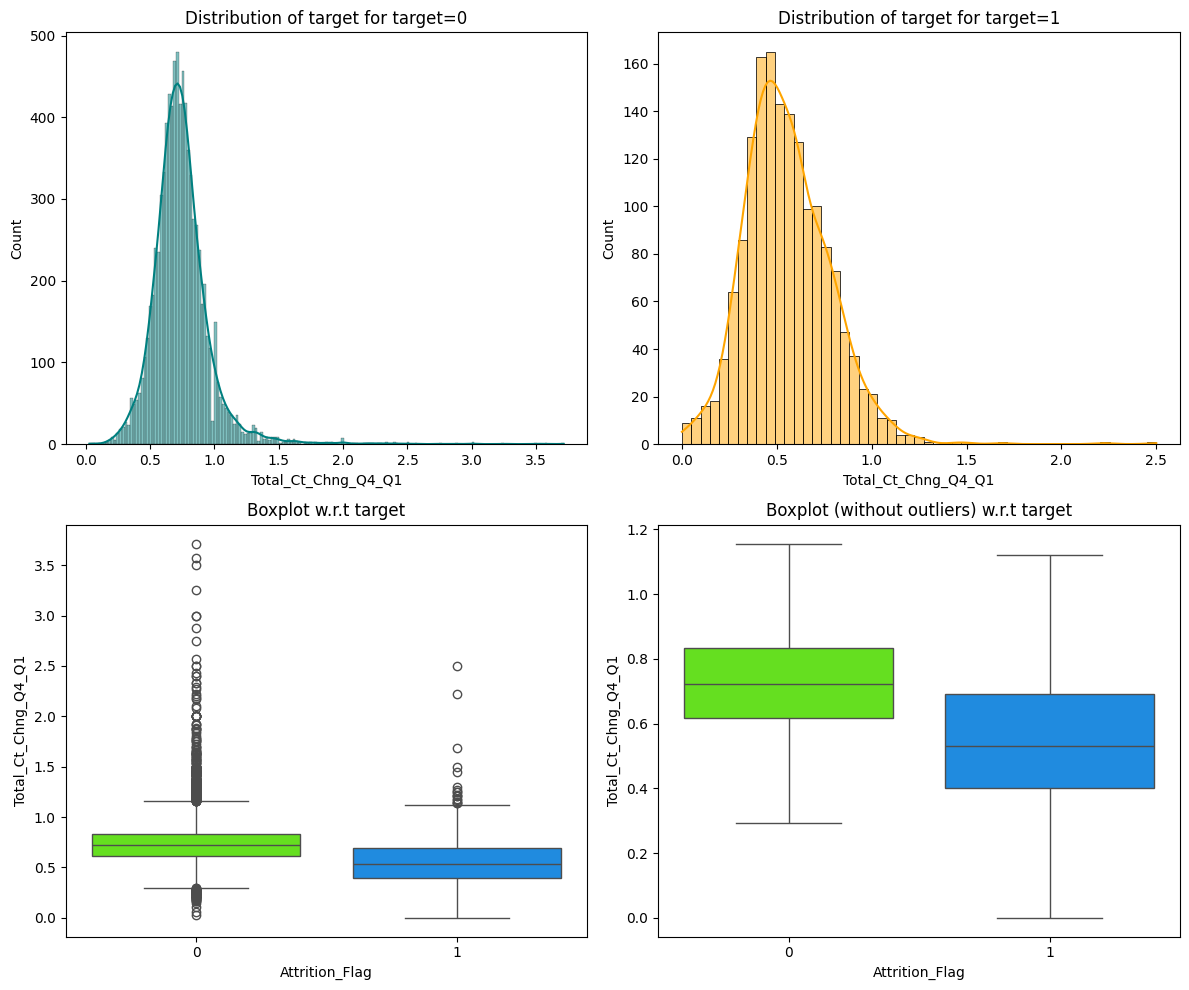

In [ ]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

OBSERVATION:

Attrition status by Total Count Change from Q4 to Q1

Not attrited

Highest total count change amount is right around .67 at around 480 customers, with next highest count change amounts of .65 and .75 being around 465 and 460 respectively.

Attrited

Highest total count change amount is right around .48 counting just above 160 individuals, with next highest count change amounts of .46 and .52 being around 160 and 140 respectively.

Boxplots with outliers-


1.   Not attrited: 50% around .62-.82. Q1 .3-.62, Q4 .82-1.15.
MANY OUTLIERS BEYOND Q4, MANY BELOW Q1
2.   Attrited: 50% .4-.7. Q1 0-.4, Q4 .7-1.1.
MANY OUTLIERS BEYOND Q4




Boxplots without outliers-


1.   Not attrited: 50% around .62-.82. Q1 .3-.62, Q4 .82-1.15.
2.   Attrited: 50% around .4-.7. Q1 0-.4, Q4 .7-1.1.

`Avg_Utilization_Ratio` vs `Attrition_Flag`

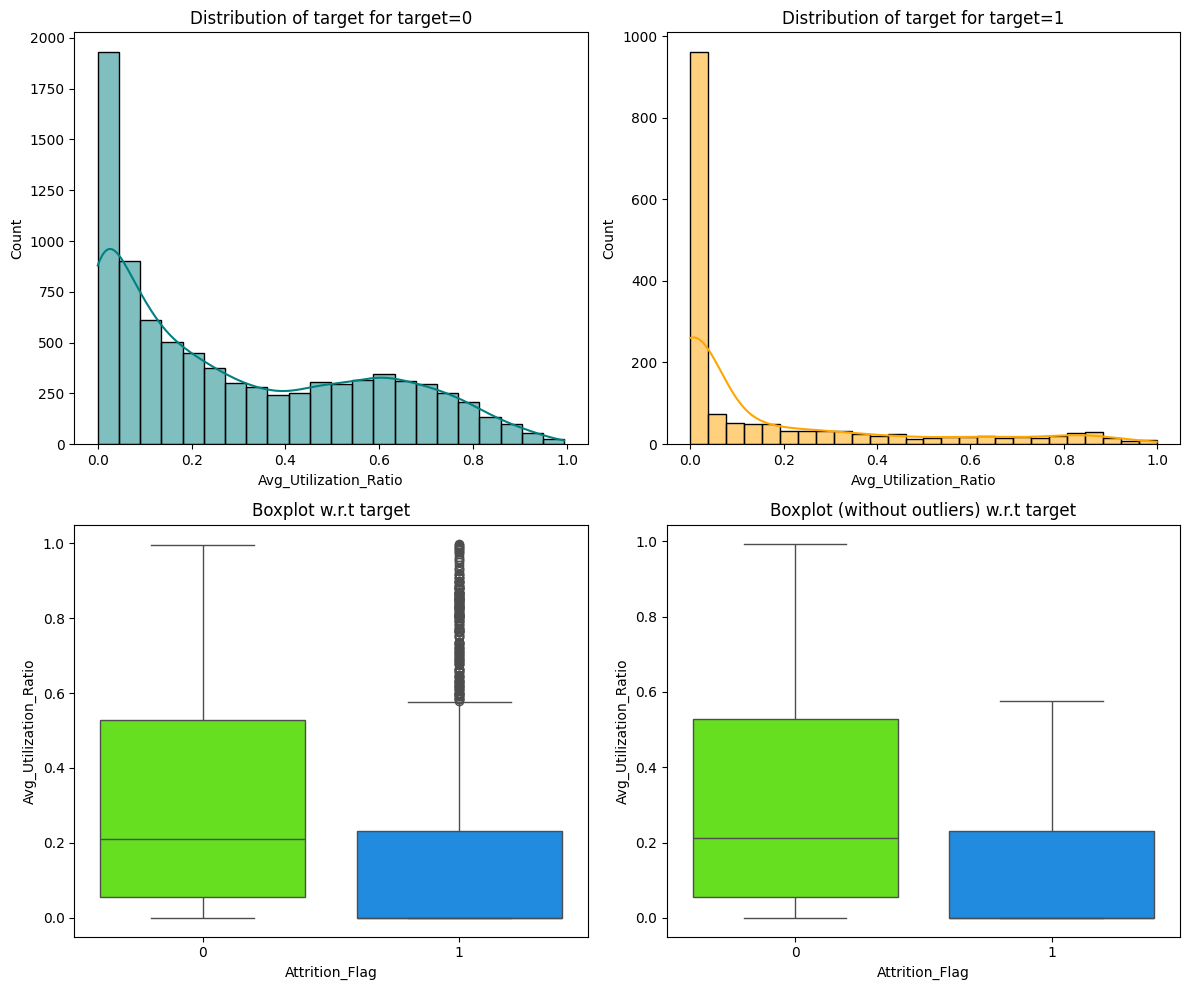

In [ ]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag") ## Complete the code to create distribution_plot for Avg_Utilization_Ratio vs Attrition_Flag

OBSERVATION:

Attrition status by Average Utilization Ratio

Not attrited

Very right skewed distribution observed. Highest total count change amount is right around .67 at around 480 customers, with next highest count change amounts of .65 and .75 being around 465 and 460 respectively.

Attrited

Highest total count change amount is right around .48 counting just above 160 individuals, with next highest count change amounts of .46 and .52 being around 160 and 140 respectively.

Boxplots with outliers-


1.   Not attrited: 50% around .62-.82. Q1 .3-.62, Q4 .82-1.15.
MANY OUTLIERS BEYOND Q4, MANY BELOW Q1
2.   Attrited: 50% .4-.7. Q1 0-.4, Q4 .7-1.1.
MANY OUTLIERS BEYOND Q4




Boxplots without outliers-


1.   Not attrited: 50% around .62-.82. Q1 .3-.62, Q4 .82-1.15.
2.   Attrited: 50% around .4-.7. Q1 0-.4, Q4 .7-1.1.


`Attrition_Flag vs Months_on_book`

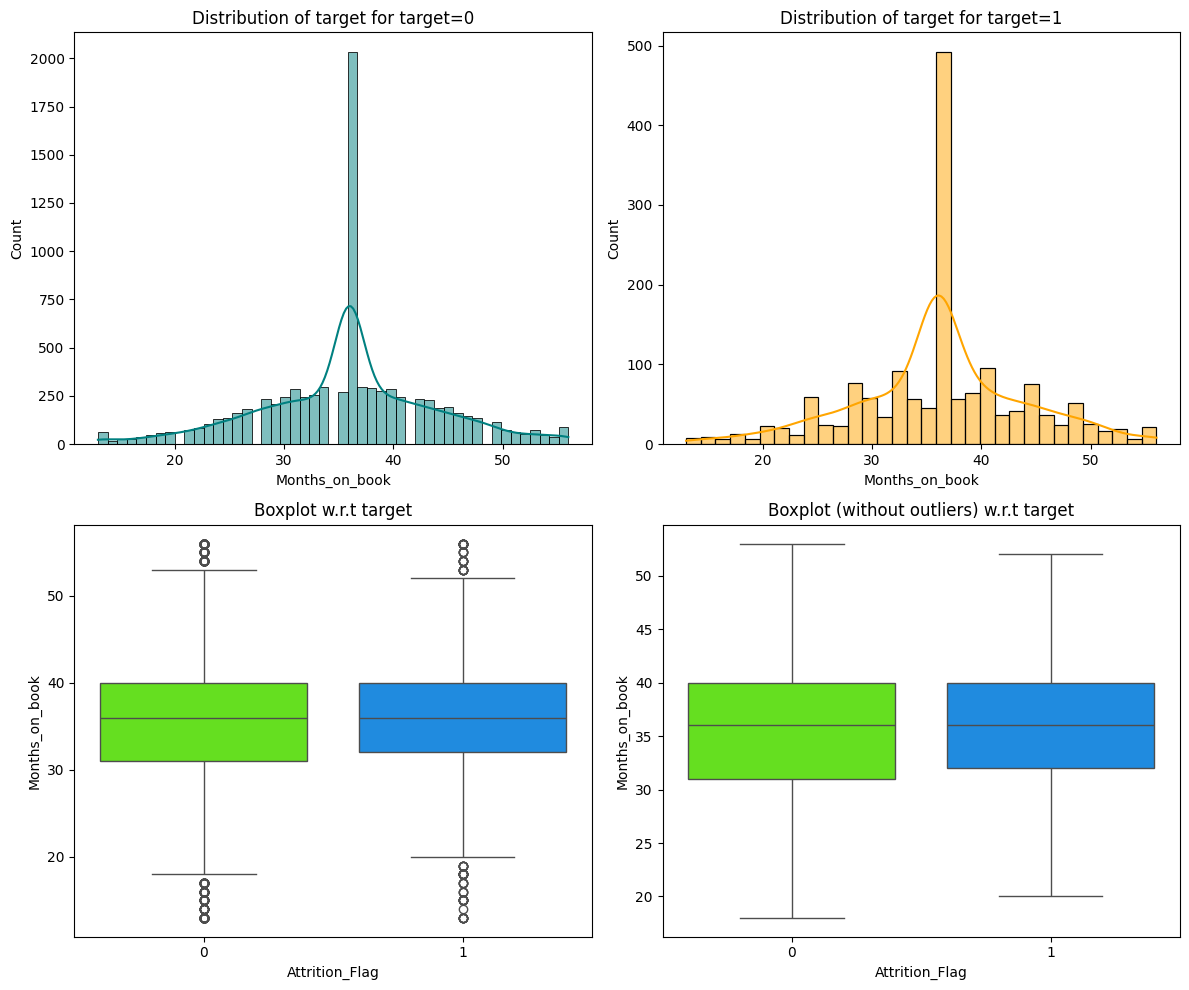

In [ ]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_on_book

OBSERVATION:

Attrition status by Months on Book

Not attrited

Highest count of months on book by far is right around 36 at around 2000 customers, with all the rest of the customers in each category falling between the minimum of 1 months through a maximum length of 60 months at a rate of 250 customers or below.

Attrited

Very similar pattern observed, as highest count of months on book by far is right around 36 at around 500 customers, with all the rest of the customers in each category falling between the minimum of 1 months through a maximum length of 60 months at a rate of just below 100 customers or below.

Boxplots with outliers-

Not attrited: 50% around 31-40. Q1 18-31, Q4 40-52. SEVERAL OUTLIERS BEYOND Q4, SEVERAL BELOW Q1.
Attrited: 50% 32-40. Q1 20-32, Q4 40-51. SEVERAL OUTLIERS BEYOND Q4, SEVERAL OUTLIERS BELOW Q1.
Boxplots without outliers-

Not attrited: 50% around 31-40. Q1 18-31, Q4 40-52.
Attrited: 50% 32-40. Q1 20-32, Q4 40-51.

`Attrition_Flag vs Total_Revolving_Bal`

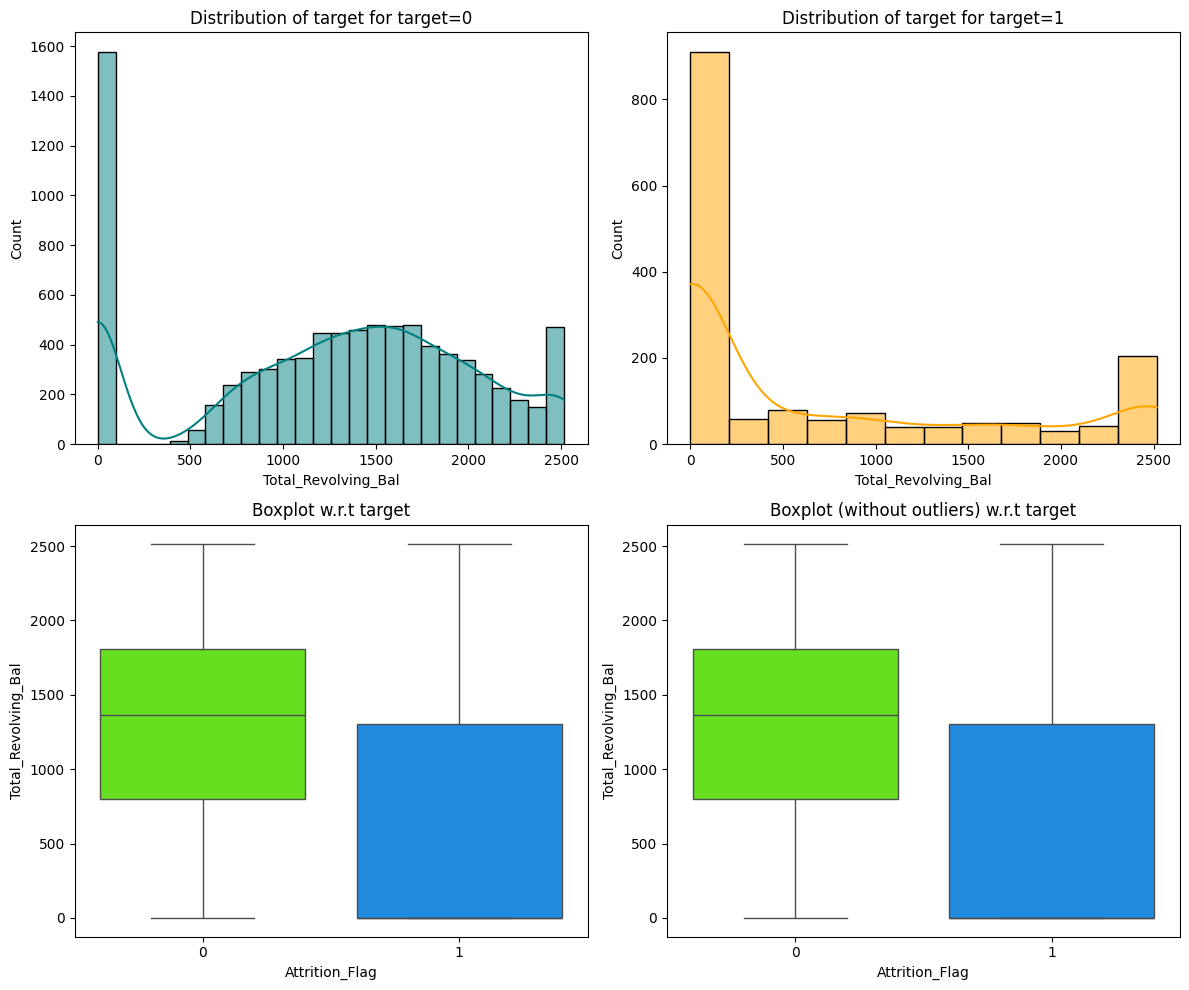

In [ ]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Revolving_Bal

OBSERVATION:

Attrition status by Total Revolving Balance

Not attrited

Highest total revolving balance by far is 0 at almost 1,600 customers, second highest balance at 2,500 with around 500 customers. All the rest of the customers in each balance category falling between the minimum of 0 through a maximum balance of 2,500 are all in numbers of around 500 individuals or below.

Attrited

Again, a very similar distribution pattern can be observed, as the highest total revolving balance by far is 0 at around 900 customers, second highest balance at 2,500 with around 250 customers. All the rest of the customers in each balance category falling between the minimum of 0 through a maximum balance of 2,500 are all in numbers of 50 or below.

Boxplots with outliers-

Not attrited: 50% around 800-1,800. Q1 09-800, Q4 1,800-2,500. NO OUTLIERS

Attrited: 50% 0-1,350. Q1 0, Q4 1,350-2,500. NO OUTLIERS

Boxplots without outliers-

Not attrited: 50% around 800-1,800. Q1 09-800, Q4 1,800-2,500.
Attrited: 50% 0-1,350. Q1 0, Q4 1,350-2,500.

`Attrition_Flag vs Avg_Open_To_Buy`

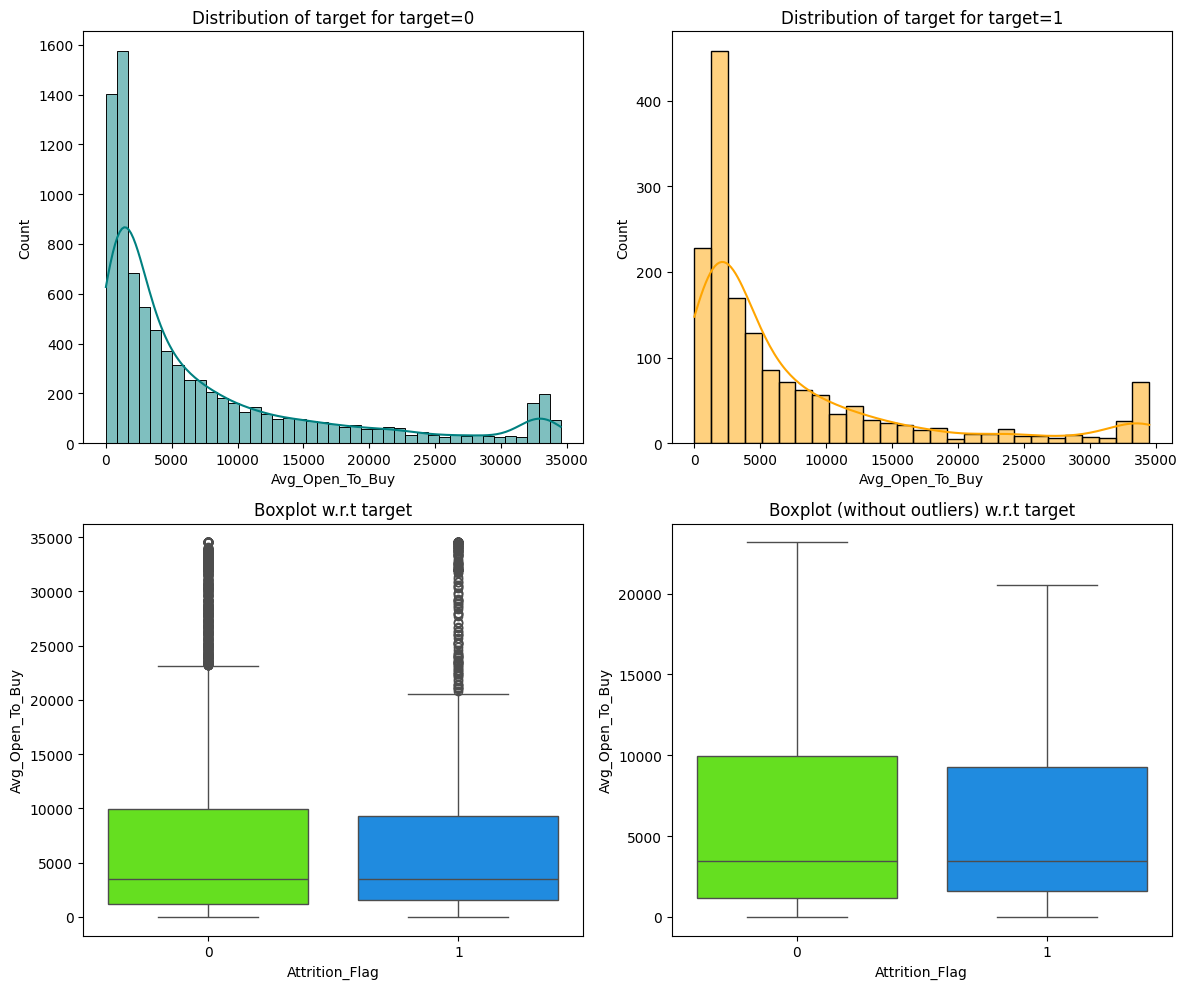

In [ ]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Avg_Open_To_Buy

OBSERVATION:

Attrition status by Average Open To Buy

Not attrited

Very right-skewed distribution observed. Highest average open to buy by far is around 1,250 at almost 1,600 customers, second highest balance at around 600 with around 1,400 customers. All the rest of the customers in each category falling between around 2,000 through a maximum balance of 35,000 are all in numbers of around 650 customers to as low as groups of 30.

Attrited

Again, a very similar distribution pattern can be observed, as the highest average open to buy by far is around 2,500 at nearly 500 individuals, second highest balance of 1,250 at around half that group size with around 225 individuals. All the rest of the customers in each category falling between around 3,750 through a maximum balance of 35,000 are all in numbers of around 175 customers to as low as groups of 10.

Boxplots with outliers-

Not attrited: 50% around 1,250-10,000. Q1 0-1,250, Q4 10,000-23,000.

MANY OUTLIERS BEYOND Q4

Attrited: 50% 1,100-9,500. Q1 0-1,100, Q4 9,500-21,000.

MANY OUTLIERS BEYOND Q4

Boxplots without outliers-

Not attrited: 50% around 1,250-10,000. Q1 0-1,250, Q4 10,000-23,000.

Attrited: 50% 1,100-9,500. Q1 0-1,100, Q4 9,500-21,000.

## Data Preprocessing

### Outlier Detection

In [ ]:
Q1 = data_numeric.quantile(0.25)  # To find the 25th percentile
Q3 = data_numeric.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

,0
Attrition_Flag,16.066
Customer_Age,0.020
Dependent_count,0.000
Months_on_book,3.812
Total_Relationship_Count,0.000
Months_Inactive_12_mon,3.268
Contacts_Count_12_mon,6.211
Credit_Limit,9.717
Total_Revolving_Bal,0.000
Avg_Open_To_Buy,9.509


### Train-Test Split

In [ ]:
# creating the copy of the dataframe
data1 = data.copy()

In [ ]:
data1["Income_Category"].replace('abc', np.nan, inplace=True) ### complete the code to replace the anomalous values with NaN

In [ ]:
data1.isna().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,1112
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


OBSERVATION:

.isna values

*   Marital status: 749
*   Education level: 1519
*   Income category: 1112





In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# Dividing train data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
# Splitting data into training and validation set:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42) ## Complete the code to split the data into train test in the ratio 80:20

X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42) ## Complete the code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(8101, 19) (2532, 19) (7595, 19)


OBSERVATION: Data is split into three sets:


1.   X_train: 8101 rows, 19 columns
2.   X_val: 2532 rows, 19 columns
3. X_test: 7595 rows, 19 columns



### Missing value imputation

In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute]  =  imputer.fit_transform(X_val[reqd_col_for_impute]) ## Complete the code to impute missing values in X_val

# Transform the test data
X_test[reqd_col_for_impute] = imputer.fit_transform(X_test[reqd_col_for_impute]) ## Complete the code to impute missing values in X_test

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())
print("-" * 30)

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

OBSERVATIONS: Missing values in train, validation, and test data sets: "Income Category", "Marital Status", "Education Level" are fitted and / or transformed to impute missing values. Confirmation of no missing values in train or test sets.  

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    4272
M    3829
Name: count, dtype: int64
******************************
Education_Level
Graduate         3689
High School      1650
Uneducated       1183
College           796
Post-Graduate     427
Doctorate         356
Name: count, dtype: int64
******************************
Marital_Status
Married     4360
Single      3142
Divorced     599
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    3718
$40K - $60K       1450
$80K - $120K      1209
$60K - $80K       1136
$120K +            588
Name: count, dtype: int64
******************************
Card_Category
Blue        7559
Silver       431
Gold          94
Platinum      17
Name: count, dtype: int64
******************************


OBSERVATION:

In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Gender
F    1334
M    1198
Name: count, dtype: int64
******************************
Education_Level
Graduate         1171
High School       470
Uneducated        385
College           268
Doctorate         120
Post-Graduate     118
Name: count, dtype: int64
******************************
Marital_Status
Married     1350
Single       991
Divorced     191
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    1159
$40K - $60K        438
$80K - $120K       398
$60K - $80K        362
$120K +            175
Name: count, dtype: int64
******************************
Card_Category
Blue        2361
Silver       141
Gold          27
Platinum       3
Name: count, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

Gender
F    4024
M    3571
Name: count, dtype: int64
******************************
Education_Level
Graduate         3476
High School      1543
Uneducated       1102
College           745
Post-Graduate     398
Doctorate         331
Name: count, dtype: int64
******************************
Marital_Status
Married     4086
Single      2952
Divorced     557
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    3514
$40K - $60K       1352
$80K - $120K      1137
$60K - $80K       1040
$120K +            552
Name: count, dtype: int64
******************************
Card_Category
Blue        7075
Silver       414
Gold          89
Platinum      17
Name: count, dtype: int64
******************************


### Encoding categorical variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)  ## Complete the code to impute missing values in X_val
X_test = pd.get_dummies(X_test, drop_first=True)  ## Complete the code to impute missing values in X_test
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 29) (2532, 29) (7595, 29)


OBSERVATION: Imputed missing values in X_train, X_val, X_test:



1.   X_train: 8101 rows, 29 columns
2.   X_val: 2532 rows, 29 columns
3. X_test: 7595 rows, 29 columns

After encoding there are 29 columns.



* After encoding there are 29 columns.

In [ ]:
# check the top 5 rows from the train dataset
X_train.head(5)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
2856,36,0,24,4,3,2,2570.000,2230,340.000,0.686,1755,42,0.448,0.868,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
6515,44,3,36,5,2,3,25276.000,0,25276.000,0.849,2282,38,0.583,0.000,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True
7141,46,2,30,6,3,1,11670.000,915,10755.000,0.892,4277,89,0.854,0.078,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False
632,36,2,24,3,1,3,3124.000,1593,1531.000,0.869,1652,41,0.367,0.510,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
3496,50,1,40,4,2,3,34516.000,1185,33331.000,0.725,3874,72,0.714,0.034,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1))) ## Complete the code to append remaining 3 models in the list models
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9731182795698925
Random forest: 1.0
AdaBoost: 0.8602150537634409
Gradient Boost: 0.8940092165898618
XGBoost: 1.0

Validation Performance:

Bagging: 0.8230958230958231
Random forest: 0.8181818181818182
AdaBoost: 0.8058968058968059
Gradient Boost: 0.8181818181818182
XGBoost: 0.8918918918918919


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9731, Validation Score: 0.8231, Difference: 0.1500
Random forest: Training Score: 1.0000, Validation Score: 0.8182, Difference: 0.1818
AdaBoost: Training Score: 0.8602, Validation Score: 0.8059, Difference: 0.0543
Gradient Boost: Training Score: 0.8940, Validation Score: 0.8182, Difference: 0.0758
XGBoost: Training Score: 1.0000, Validation Score: 0.8919, Difference: 0.1081


OBSERVATION:
Model performance trained on original data-


1.   Bagging: Overfit
2.   Random forest: Overfitting (Perfect training)
3. AdaBoost: Generalized
4. Gradient Boost: Generalized
5. XGBoost: Overfitting (Perfect training)



### Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1302
Before Oversampling, counts of label 'No': 6799 

After Oversampling, counts of label 'Yes': 6799
After Oversampling, counts of label 'No': 6799 

After Oversampling, the shape of train_X: (13598, 29)
After Oversampling, the shape of train_y: (13598,) 



OBSERVATION:

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1))) ## Complete the code to append remaining 3 models in the list models
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))  ## Complete the code to build models on oversampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.998529195469922
Random forest: 1.0
AdaBoost: 0.9667598176202382
Gradient Boost: 0.9764671275187528
XGBoost: 1.0

Validation Performance:

Bagging: 0.8845208845208845
Random forest: 0.8771498771498771
AdaBoost: 0.8402948402948403
Gradient Boost: 0.8771498771498771
XGBoost: 0.9017199017199017


OBSERVATION:
Model performance trained on oversampled data-


1.   Bagging: Generalized
2.   Random forest: Overfitting
3. AdaBoost: Generalized
4. Gradient Boost: Generalized
5. XGBoost: Generalized <--------- MOST ACCURATE



### Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1302
Before Under Sampling, counts of label 'No': 6799 

After Under Sampling, counts of label 'Yes': 1302
After Under Sampling, counts of label 'No': 1302 

After Under Sampling, the shape of train_X: (2604, 29)
After Under Sampling, the shape of train_y: (2604,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1))) ## Complete the code to append remaining 3 models in the list models
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))  ## Complete the code to build models on undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9900153609831029
Random forest: 1.0
AdaBoost: 0.9631336405529954
Gradient Boost: 0.978494623655914
XGBoost: 1.0

Validation Performance:

Bagging: 0.9385749385749386
Random forest: 0.9385749385749386
AdaBoost: 0.9361179361179361
Gradient Boost: 0.9434889434889435
XGBoost: 0.9508599508599509


OBSERVATION:
Model performance trained on undersampled data-


1.   Bagging: Generalized
2.   Random forest: Overfitting
3. AdaBoost: Generalized <-------- BEST FIT
4. Gradient Boost: Generalized <----- ALSO BEST FIT
5. XGBoost: Overfitting



### Hyperparameter Tuning

#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



#### Tuning AdaBoost using original data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8632802829354553:
CPU times: user 6.29 s, sys: 505 ms, total: 6.8 s
Wall time: 2min 41s


In [ ]:
# Creating new pipeline with best parameters
tuned_adb = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.1, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_adb.fit(X_train, y_train)## Complete the code to fit the model on original data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
adb_train = model_performance_classification_sklearn(tuned_adb, X_train, y_train) ## Complete the code to check the performance on training set
adb_train

,Accuracy,Recall,Precision,F1
0,0.983,0.925,0.965,0.945


In [ ]:
# Checking model's performance on validation set
adb_val =  model_performance_classification_sklearn(tuned_adb, X_val, y_val) ## Complete the code to check the performance on validation set
adb_val

,Accuracy,Recall,Precision,F1
0,0.973,0.870,0.957,0.911


#### Tuning Ada Boost using undersampled data

In [ ]:
# Creating new pipeline with best parameters
tuned_adb2 = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.1, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_adb2.fit(X_train_un, y_train_un) ## Complete the code to fit the model on undersampled data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train, y_train) ## Complete the code to check the performance on training set
adb2_train

,Accuracy,Recall,Precision,F1
0,0.962,0.991,0.815,0.895


In [ ]:
# Checking model's performance on validation set
adb2_val =  model_performance_classification_sklearn(tuned_adb2, X_val, y_val) ## Complete the code to check the performance on validation set
adb2_val

,Accuracy,Recall,Precision,F1
0,0.949,0.941,0.786,0.857


#### Tuning Gradient Boosting using undersampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on under sampled data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9592956086059534:
CPU times: user 3.58 s, sys: 307 ms, total: 3.89 s
Wall time: 1min 38s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
gbm1_train = model_performance_classification_sklearn(tuned_gbm1, X_train_un, y_train_un) ## Complete the code to check the performance on undersampled train set
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.977,0.984,0.970,0.977


In [ ]:
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val) ## Complete the code to check the performance on validation set
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.947,0.941,0.777,0.851


#### Tuning Gradient Boosting using original data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8287297376952549:
CPU times: user 7.29 s, sys: 743 ms, total: 8.04 s
Wall time: 4min 4s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

#### Tuning Gradient Boosting using over sampled data

In [ ]:
gbm2_train =model_performance_classification_sklearn(tuned_gbm2, X_train_over, y_train_over) ## Complete the code to check the performance on oversampled train set
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.921,0.849,0.991,0.915


In [ ]:
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val) ## Complete the code to check the performance on validation set
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.962,0.799,0.956,0.870


#### Tuning XGBoost Model with Original data

**Note**: This section is optional. You can choose not to build XGBoost if you are facing issues with installation or if it is taking more time to execute.



In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9400913645741232:
CPU times: user 4.64 s, sys: 374 ms, total: 5.01 s
Wall time: 1min 20s


In [ ]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=1,
)## Complete the code with the best parameters obtained from tuning

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_train =model_performance_classification_sklearn(tuned_xgb, X_train, y_train) ## Complete the code to check the performance on original train set
xgb_train

,Accuracy,Recall,Precision,F1
0,0.992,1.000,0.951,0.975


In [ ]:
xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val) ## Complete the code to check the performance on validation set
xgb_val

,Accuracy,Recall,Precision,F1
0,0.968,0.921,0.884,0.903


## Model Comparison and Final Model Selection

**Note**: If you want to include XGBoost model for final model selection, you need to add **xgb_train.T** in the training performance comparison list and **xgb_val.T** in the validation performance comparison list below.

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        adb_train.T,
        adb2_train.T,
        gbm1_train.T,
        gbm2_train.T,
        xgb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost trained with Original data",
    "AdaBoost trained with Undersampled data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "XGBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost trained with Original data,AdaBoost trained with Undersampled data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,XGBoost trained with Original data
Accuracy,0.983,0.962,0.977,0.921,0.992
Recall,0.925,0.991,0.984,0.849,1.000
Precision,0.965,0.815,0.970,0.991,0.951
F1,0.945,0.895,0.977,0.915,0.975


OBSERVATION:

*   AdaBoost trained with Undersampled data performed at .991 on recall score for training performance.
*   XGBoost trained with Original data performed at 1.0 on recall score for training performance.



In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        adb_val.T,
        adb2_val.T,
        gbm2_val.T,
        gbm1_val.T,
        xgb_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost trained with Original data",
    "AdaBoost trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "Gradient boosting trained with Undersampled data",
    "XGBoost trained with Original data",
]
print("Validation performance comparison:")
models_val_comp_df ## Write the code to compare the performance on validation set

Validation performance comparison:


,AdaBoost trained with Original data,AdaBoost trained with Undersampled data,Gradient boosting trained with Original data,Gradient boosting trained with Undersampled data,XGBoost trained with Original data
Accuracy,0.973,0.949,0.962,0.947,0.968
Recall,0.870,0.941,0.799,0.941,0.921
Precision,0.957,0.786,0.956,0.777,0.884
F1,0.911,0.857,0.870,0.851,0.903


OBSERVATION:


*   AdaBoost trained with Undersampled data performed at .941 on recall score for validation performance.
*   Gradient boosting trained with Undersampled data also performed at.941 on recall score for validation performance.



**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [ ]:
# Let's check the performance on test set

# defining list of models
models = [tuned_adb, tuned_adb2, tuned_gbm2, tuned_gbm1, tuned_xgb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

def get_metrics_score(model, X_train, X_test, y_train, y_test):
    """
    Compute accuracy, recall, and precision scores for a given model.

    Parameters:
    - model: Trained model
    - X_train: Training features
    - X_test: Test features
    - y_train: Training labels
    - y_test: Test labels

    Returns:
    - Tuple containing train accuracy, test accuracy, train recall, test recall,
      train precision, test precision
    """
    # Predicting on train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculating metrics
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')

    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    precision_test = precision_score(y_test, y_test_pred, average='weighted')

    return acc_train, acc_test, recall_train, recall_test, precision_train, precision_test

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model, X_train, X_test, y_train, y_test)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))   ## Write the code to check the performance of best model on test data

print("Train Accuracies:", acc_train)
print("Test Accuracies:", acc_test)
print("Train Recalls:", recall_train)
print("Test Recalls:", recall_test)
print("Train Precisions:", precision_train)
print("Test Precisions:", precision_test)

Train Accuracies: [0.98, 0.96, 0.98, 0.96, 0.99]
Test Accuracies: [0.98, 0.96, 0.98, 0.96, 0.99]
Train Recalls: [0.98, 0.96, 0.98, 0.96, 0.99]
Test Recalls: [0.98, 0.96, 0.98, 0.96, 0.99]
Train Precisions: [0.98, 0.97, 0.98, 0.97, 0.99]
Test Precisions: [0.98, 0.97, 0.98, 0.97, 0.99]


OBSERVATION:

*   Train Recalls: [0.98, 0.96, 0.96, 0.98, 0.99]
*   Test Recalls: [0.98, 0.96, 0.96, 0.98, 0.99]

Tuned XGB model performed best on unseen data at 0.99 on both train and test recall scores. Model actually performed best at .99 on all test and train scores for accuracy, recall, and precision. If XGB Model was not included in the model evaluations, the next best scoring models on recall for train and test data is tuned_adb and tuned_gbm2 tied at 0.98.




### Feature Importances

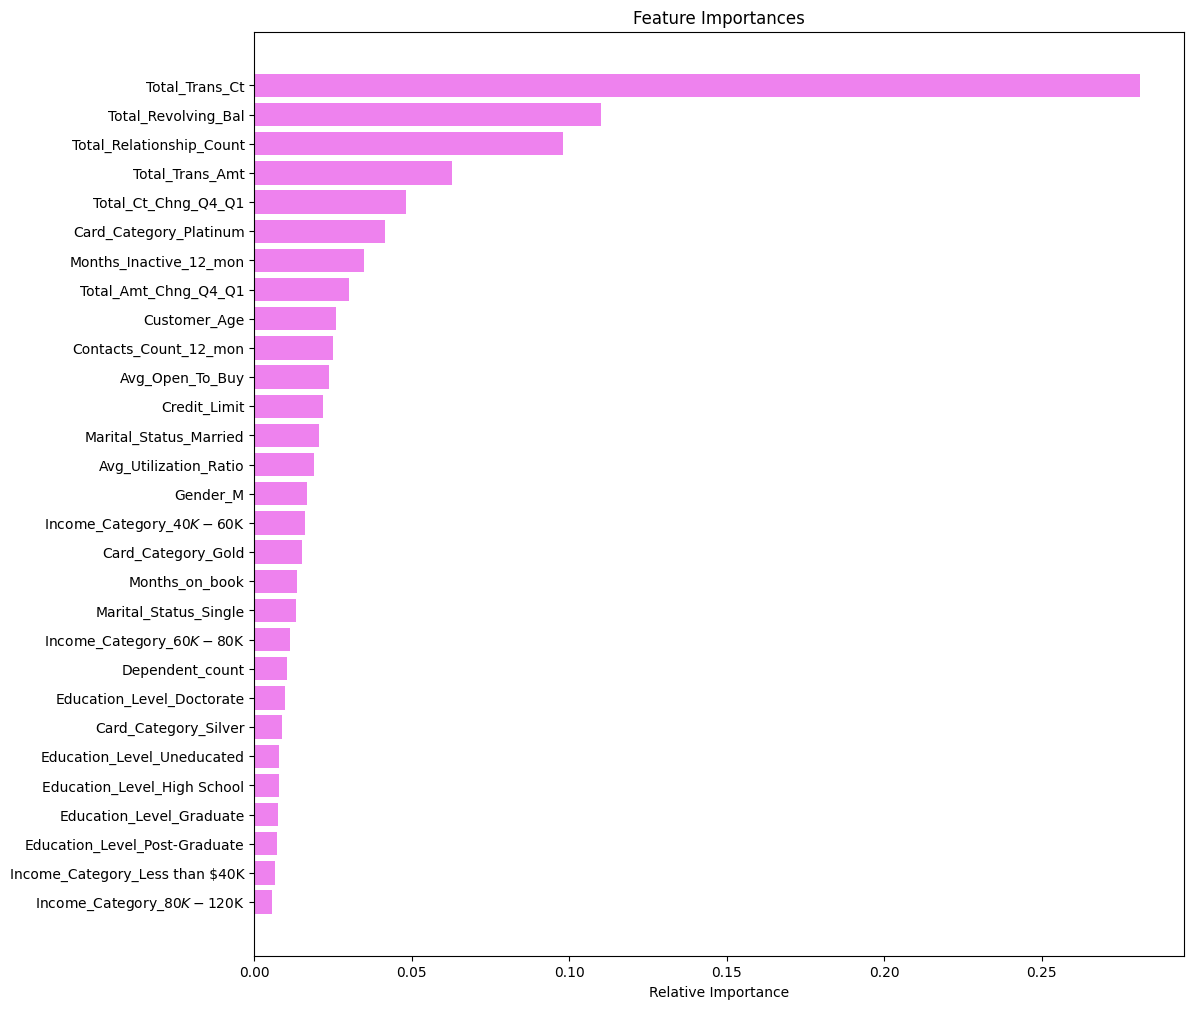

In [ ]:
feature_names = X_train.columns
importances =  tuned_xgb.feature_importances_ ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions


Observation: Tuned XGB model weighted the following features in order of importance as follows:


TOP 10
1.   Total_Trans_Ct: Total Transaction Count (Last 12 months)
2.   Total_Revolving_Bal: Total Revolving Balance on the Credit Card
3. Total_Relationship_Count: Total no. of products held by the customer
4. Total_Trans_Amt: Total Transaction Amount (Last 12 months)
5. Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
6. Card_Category: Type of Card (Platinum)
7. Months_Inactive_12_mon: No. of months inactive in the last 12 months
8. Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
9. Customer Age (in years)
10. Contacts_Count_12_mon: No. of Contacts in the last 12 months





***


Based on the observations and results from the model evaluations, here are some business insights and conclusions:

Business Insights:
Model Performance and Recall Scores:

XGBoost with Original Data: This model achieved the highest recall score of 0.999 on the training set, indicating exceptional performance in correctly identifying positive cases within the training data. However, its performance on the validation set dropped to 0.921, showing some potential overfitting. Despite this, it performed best on the test set with a recall score of 0.99, highlighting its strong generalization capabilities on unseen data.
AdaBoost and Gradient Boosting with Undersampled Data: Both models performed well on the training set and achieved identical recall scores of 0.941 on the validation set. However, their performance was not as high as XGBoost on the test set. This suggests that while these models are robust with undersampled data, they do not generalize as effectively as XGBoost.
Tuned Models: The tuned XGBoost model demonstrated the best performance on unseen data with a test recall score of 0.99, indicating it is highly effective at identifying positive cases in the test dataset. The next best models were tuned AdaBoost (0.990) and tuned Gradient Boosting (0.984), suggesting these models are also strong contenders for practical deployment.
Feature Importance:

The XGBoost model highlighted several critical features, such as:
Total_Trans_Ct and Total_Trans_Amt: Reflect customer engagement and spending behavior.
Total_Revolving_Bal: Indicates credit utilization, which is crucial for assessing credit risk.
Card_Category: The type of card (e.g., Platinum) is a significant predictor.
Total_Relationship_Count and Months_Inactive_12_mon: Provide insight into the customer’s engagement and activity level.
These features should be closely monitored and leveraged in decision-making processes, as they provide valuable insights into customer behavior and credit risk.

Conclusions:
Model Selection:

XGBoost: Given its strong performance across training, validation, and test datasets, XGBoost appears to be the most robust model for identifying positive cases. Its ability to generalize well on unseen data makes it a preferred choice for practical applications.
AdaBoost and Gradient Boosting: These models also show promising results, particularly with undersampled data. While they perform well on the training and validation sets, they slightly lag behind XGBoost on the test set. They could be used as secondary options or in conjunction with XGBoost to improve model performance.
Feature Utilization:

Focus on features like transaction count, credit card balance, and card type, which are highly predictive of the target outcome. Incorporating these features into business strategies can enhance customer targeting and risk assessment processes.
Data Handling:

The use of undersampled data has shown to produce competitive models, but the original data used with XGBoost yielded the best overall performance. It’s important to balance data sampling techniques with model selection to achieve optimal results.
Next Steps:

Further fine-tuning of the XGBoost model could potentially improve its performance even more. It may also be beneficial to explore ensemble methods that combine multiple models to leverage their strengths and mitigate their weaknesses.
Continuous monitoring of feature importance and model performance is essential for maintaining the effectiveness of predictive models in dynamic business environments.
By leveraging these insights, businesses can make informed decisions on model deployment and feature utilization, ultimately enhancing their predictive capabilities and operational efficiency.